# 1.Data loading and preparation

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
data_frame= pd.read_excel("Data Science - Intern - Data Set.xlsx")

In [3]:
data_frame.head()

uniqueid          ts        lat        lng  external_bat_voltage  \
0  it_220403501  1709340731  19.069340  78.355148                   NaN   
1  it_220403501  1709340794  19.069347  78.355141                   NaN   
2  it_220403501  1709340857  19.069414  78.355179                   NaN   
3  it_220403501  1709340920  19.069258  78.355225                   NaN   
4  it_220403501  1709340983  19.069094  78.355339                   NaN   

   internal_bat_voltage  engineload  tanklevel  throttle  coolant  ...  \
0                   NaN          28        NaN       NaN       33  ...   
1                   NaN          22        NaN       NaN       41  ...   
2                   NaN          25        NaN       NaN       48  ...   
3                   NaN          35        NaN       NaN       52  ...   
4                   NaN           0        NaN       NaN       57  ...   

   live_location  to_be_expired_at  status  event_id  \
0            NaN               NaN     NaN       NaN   
1            NaN               NaN     NaN       NaN   
2            NaN               NaN     NaN       NaN   
3            NaN               NaN     NaN       NaN   
4            NaN               NaN     NaN       NaN   

   particulated_trap_inlet_pressure  boost_pressure  \
0                               NaN             NaN   
1                               NaN             NaN   
2                               NaN             NaN   
3                               NaN             NaN   
4                               NaN             NaN   

   intake_manifold_1_temperature  air_inlet_pressure  exhaust_gas_temperature  \
0                            NaN                 NaN                      NaN   
1                            NaN                 NaN                      NaN   
2                            NaN                 NaN                      NaN   
3                            NaN                 NaN                      NaN   
4                            NaN                 NaN                      NaN   

   adblue_level  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 141 columns]

## Structure & Shape of the dataframe (Rows & column)

In [4]:
data_frame.shape

(18434, 141)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB


In [6]:
data_frame.describe()

ts           lat           lng  external_bat_voltage  \
count  1.843400e+04  18434.000000  18434.000000                   0.0   
mean   1.711641e+09     18.724254     78.865351                   NaN   
std    1.275937e+06      0.816184      3.208032                   NaN   
min    1.709341e+09      0.000000      0.000000                   NaN   
25%    1.710903e+09     18.701308     78.758909                   NaN   
50%    1.711692e+09     18.853032     79.092408                   NaN   
75%    1.712682e+09     18.921385     79.352821                   NaN   
max    1.713636e+09     19.069500     79.481804                   NaN   

       internal_bat_voltage    engineload  tanklevel  throttle       coolant  \
count                   0.0  18434.000000        0.0       0.0  18434.000000   
mean                    NaN     38.141206        NaN       NaN     84.571336   
std                     NaN     29.889358        NaN       NaN      7.718346   
min                     NaN      0.000000        NaN       NaN     30.000000   
25%                     NaN     10.000000        NaN       NaN     83.000000   
50%                     NaN     31.000000        NaN       NaN     85.000000   
75%                     NaN     64.000000        NaN       NaN     89.000000   
max                     NaN    100.000000        NaN       NaN     98.000000   

       intakeairtemp  ...  live_location  to_be_expired_at  status  event_id  \
count            0.0  ...            0.0               0.0     0.0       0.0   
mean             NaN  ...            NaN               NaN     NaN       NaN   
std              NaN  ...            NaN               NaN     NaN       NaN   
min              NaN  ...            NaN               NaN     NaN       NaN   
25%              NaN  ...            NaN               NaN     NaN       NaN   
50%              NaN  ...            NaN               NaN     NaN       NaN   
75%              NaN  ...            NaN               NaN     NaN       NaN   
max              NaN  ...            NaN               NaN     NaN       NaN   

       particulated_trap_inlet_pressure  boost_pressure  \
count                               0.0             0.0   
mean                                NaN             NaN   
std                                 NaN             NaN   
min                                 NaN             NaN   
25%                                 NaN             NaN   
50%                                 NaN             NaN   
75%                                 NaN             NaN   
max                                 NaN             NaN   

       intake_manifold_1_temperature  air_inlet_pressure  \
count                            0.0                 0.0   
mean                             NaN                 NaN   
std                              NaN                 NaN   
min                              NaN                 NaN   
25%                              NaN                 NaN   
50%                              NaN                 NaN   
75%                              NaN                 NaN   
max                              NaN                 NaN   

       exhaust_gas_temperature  adblue_level  
count                      0.0  14770.000000  
mean                       NaN     84.795315  
std                        NaN     15.571199  
min                        NaN     44.400000  
25%                        NaN     68.800000  
50%                        NaN     88.400000  
75%                        NaN     99.200000  
max                        NaN    100.000000  

[8 rows x 135 columns]

## Check for Missing values

In [7]:
missing_values = data_frame.isnull().sum() # null values found in the data set
missing_values

uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 141, dtype: int64

## check for duplicate values

In [8]:
data_frame.duplicated().sum() 

0

### we can see that there are no duplicate values 

In [9]:
data_frame = data_frame.drop_duplicates() # to drop duplicate values but in this case there are no duplicates so we can skip 
#this step
data_frame

uniqueid          ts        lat        lng  external_bat_voltage  \
0      it_220403501  1709340731  19.069340  78.355148                   NaN   
1      it_220403501  1709340794  19.069347  78.355141                   NaN   
2      it_220403501  1709340857  19.069414  78.355179                   NaN   
3      it_220403501  1709340920  19.069258  78.355225                   NaN   
4      it_220403501  1709340983  19.069094  78.355339                   NaN   
...             ...         ...        ...        ...                   ...   
18429  it_220403501  1713635865  18.869371  79.020393                   NaN   
18430  it_220403501  1713635929  18.867130  79.018272                   NaN   
18431  it_220403501  1713635993  18.862076  79.013924                   NaN   
18432  it_220403501  1713636056  18.859493  79.011673                   NaN   
18433  it_220403501  1713636120  18.858324  79.009033                   NaN   

       internal_bat_voltage  engineload  tanklevel  throttle  coolant  ...  \
0                       NaN          28        NaN       NaN       33  ...   
1                       NaN          22        NaN       NaN       41  ...   
2                       NaN          25        NaN       NaN       48  ...   
3                       NaN          35        NaN       NaN       52  ...   
4                       NaN           0        NaN       NaN       57  ...   
...                     ...         ...        ...       ...      ...  ...   
18429                   NaN          50        NaN       NaN       89  ...   
18430                   NaN           0        NaN       NaN       92  ...   
18431                   NaN          10        NaN       NaN       87  ...   
18432                   NaN          52        NaN       NaN       87  ...   
18433                   NaN          72        NaN       NaN       90  ...   

       live_location  to_be_expired_at  status  event_id  \
0                NaN               NaN     NaN       NaN   
1                NaN               NaN     NaN       NaN   
2                NaN               NaN     NaN       NaN   
3                NaN               NaN     NaN       NaN   
4                NaN               NaN     NaN       NaN   
...              ...               ...     ...       ...   
18429            NaN               NaN     NaN       NaN   
18430            NaN               NaN     NaN       NaN   
18431            NaN               NaN     NaN       NaN   
18432            NaN               NaN     NaN       NaN   
18433            NaN               NaN     NaN       NaN   

       particulated_trap_inlet_pressure  boost_pressure  \
0                                   NaN             NaN   
1                                   NaN             NaN   
2                                   NaN             NaN   
3                                   NaN             NaN   
4                                   NaN             NaN   
...                                 ...             ...   
18429                               NaN             NaN   
18430                               NaN             NaN   
18431                               NaN             NaN   
18432                               NaN             NaN   
18433                               NaN             NaN   

       intake_manifold_1_temperature  air_inlet_pressure  \
0                                NaN                 NaN   
1                                NaN                 NaN   
2                                NaN                 NaN   
3                                NaN                 NaN   
4                                NaN                 NaN   
...                              ...                 ...   
18429                            NaN                 NaN   
18430                            NaN                 NaN   
18431                            NaN                 NaN   
18432                            NaN                 NaN   
18433                            Na

# 2.Data cleaning and preprocessing:

### Before cleaning the data set there are 141 columns

In [10]:
cleaned_data= data_frame # assigning the old data to a new data named Cleaned_data to store the cleaned data in it
cleaned_data.head(3)

uniqueid          ts        lat        lng  external_bat_voltage  \
0  it_220403501  1709340731  19.069340  78.355148                   NaN   
1  it_220403501  1709340794  19.069347  78.355141                   NaN   
2  it_220403501  1709340857  19.069414  78.355179                   NaN   

   internal_bat_voltage  engineload  tanklevel  throttle  coolant  ...  \
0                   NaN          28        NaN       NaN       33  ...   
1                   NaN          22        NaN       NaN       41  ...   
2                   NaN          25        NaN       NaN       48  ...   

   live_location  to_be_expired_at  status  event_id  \
0            NaN               NaN     NaN       NaN   
1            NaN               NaN     NaN       NaN   
2            NaN               NaN     NaN       NaN   

   particulated_trap_inlet_pressure  boost_pressure  \
0                               NaN             NaN   
1                               NaN             NaN   
2                               NaN             NaN   

   intake_manifold_1_temperature  air_inlet_pressure  exhaust_gas_temperature  \
0                            NaN                 NaN                      NaN   
1                            NaN                 NaN                      NaN   
2                            NaN                 NaN                      NaN   

   adblue_level  
0           NaN  
1           NaN  
2           NaN  

[3 rows x 141 columns]

In [11]:
no_of_rows = cleaned_data.shape[0] # before cleaning the data no. of rows were 18434
no_of_rows

18434

In [12]:
no_of_columns = cleaned_data.shape[1] # before cleaning the data no. of columns were 141
no_of_columns

141

In [13]:
# removing the columns which has all null values in the entire columns
for i in cleaned_data.columns:
    if cleaned_data[i].isnull().sum() == no_of_rows: # here this condition checks whether the no. of rows in data set is equal
                                                     #to the null values present in the column
        cleaned_data=cleaned_data.drop(i,axis=1)

In [14]:
cleaned_data

uniqueid          ts        lat        lng  engineload  coolant  \
0      it_220403501  1709340731  19.069340  78.355148          28       33   
1      it_220403501  1709340794  19.069347  78.355141          22       41   
2      it_220403501  1709340857  19.069414  78.355179          25       48   
3      it_220403501  1709340920  19.069258  78.355225          35       52   
4      it_220403501  1709340983  19.069094  78.355339           0       57   
...             ...         ...        ...        ...         ...      ...   
18429  it_220403501  1713635865  18.869371  79.020393          50       89   
18430  it_220403501  1713635929  18.867130  79.018272           0       92   
18431  it_220403501  1713635993  18.862076  79.013924          10       87   
18432  it_220403501  1713636056  18.859493  79.011673          52       87   
18433  it_220403501  1713636120  18.858324  79.009033          72       90   

       engineoiltemp  vehiclespeed       rpm  obddistance  ...  \
0          1774.9688       0.00000   749.000     60780800  ...   
1          1774.9688       0.00000  1208.375     60780800  ...   
2          1774.9688       1.40625   752.625     60780800  ...   
3          1774.9688       2.81250   996.375     60780820  ...   
4          1774.9688       4.53125  1065.750     60780840  ...   
...              ...           ...       ...          ...  ...   
18429      1774.9688      14.28125   945.125     71872976  ...   
18430      1774.9688      38.28125  1130.750     71873344  ...   
18431      1774.9688      32.34375   749.750     71874064  ...   
18432      1774.9688      17.71875   820.625     71874464  ...   
18433      1774.9688      16.21875   765.125     71874816  ...   

       engine_throttle_valve1_pos  engine_throttle_valve2_pos  enginefueltemp  \
0                           100.0                         102             215   
1                            99.6                         102             215   
2                            99.6                         102             215   
3                            99.6                         102             215   
4                           100.0                         102             215   
...                           ...                         ...             ...   
18429                       100.0                         102             215   
18430                       100.0                         102             215   
18431                       100.0                         102             215   
18432                       100.0                         102             215   
18433                       100.0                         102             215   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                         0                   1   
1                                        19                   2   
2                                         0                   1   
3                                        28                   2   
4                                         1                   2   
...                                     ...                 ...   
18429                                    34                   2   
18430                                     0                   2   
18431                                     0                   1   
18432                                    46                   9   
18433                                    44                   1   

       accelerator_pedal_pos_2  brake_switch_status  clutch_switch_status  \
0                          102             Released              Released   
1                          102             Released               Pressed   
2                          102              Pressed               Pressed   
3                          102             Released               Pressed   
4                          102             Released               Pressed   
...                        ...           

In [15]:
### now lets clear the reamining null values 

In [16]:
cleaned_data.isnull().sum()

uniqueid                                   0
ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
pluscode                                   0
vibration_status                           0
can_raw_da

### In the above cell we can see that there are some missing values present, so i will replace them with thier mean value respectively

In [17]:
cleaned_data["runtime"].fillna(value = cleaned_data["runtime"].mean(), inplace =True ) #replacing with mean of runtime
cleaned_data["fuel_level"].fillna(value = cleaned_data["fuel_level"].mean(), inplace =True ) #replacing with mean of fuel_level
cleaned_data["adblue_level"].fillna(value = cleaned_data["adblue_level"].mean(), inplace =True ) #replacing with mean of adblue_level

In [18]:
cleaned_data.isnull().sum()

uniqueid                                0
ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
engineoiltemp                           0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
selected_gear                           0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
pluscode                                0
vibration_status                        0
can_raw_data                            0
engine_throttle_valve1_pos        

### the data set is cleaned now there are zero null values and we are good to go with data visualization

In [19]:
cleaned_data.shape[0] # no. of rows after removing null values

18434

In [20]:
cleaned_data.shape[1] # no. of columns after removing null values

33

### 2nd approch of cleaning the data set is to delete the rows containing null values

In [21]:
cleaned_data_2=cleaned_data.dropna(axis=0) # here i have deleted the rows containing null values 

In [22]:
cleaned_data_2

uniqueid          ts        lat        lng  engineload  coolant  \
0      it_220403501  1709340731  19.069340  78.355148          28       33   
1      it_220403501  1709340794  19.069347  78.355141          22       41   
2      it_220403501  1709340857  19.069414  78.355179          25       48   
3      it_220403501  1709340920  19.069258  78.355225          35       52   
4      it_220403501  1709340983  19.069094  78.355339           0       57   
...             ...         ...        ...        ...         ...      ...   
18429  it_220403501  1713635865  18.869371  79.020393          50       89   
18430  it_220403501  1713635929  18.867130  79.018272           0       92   
18431  it_220403501  1713635993  18.862076  79.013924          10       87   
18432  it_220403501  1713636056  18.859493  79.011673          52       87   
18433  it_220403501  1713636120  18.858324  79.009033          72       90   

       engineoiltemp  vehiclespeed       rpm  obddistance  ...  \
0          1774.9688       0.00000   749.000     60780800  ...   
1          1774.9688       0.00000  1208.375     60780800  ...   
2          1774.9688       1.40625   752.625     60780800  ...   
3          1774.9688       2.81250   996.375     60780820  ...   
4          1774.9688       4.53125  1065.750     60780840  ...   
...              ...           ...       ...          ...  ...   
18429      1774.9688      14.28125   945.125     71872976  ...   
18430      1774.9688      38.28125  1130.750     71873344  ...   
18431      1774.9688      32.34375   749.750     71874064  ...   
18432      1774.9688      17.71875   820.625     71874464  ...   
18433      1774.9688      16.21875   765.125     71874816  ...   

       engine_throttle_valve1_pos  engine_throttle_valve2_pos  enginefueltemp  \
0                           100.0                         102             215   
1                            99.6                         102             215   
2                            99.6                         102             215   
3                            99.6                         102             215   
4                           100.0                         102             215   
...                           ...                         ...             ...   
18429                       100.0                         102             215   
18430                       100.0                         102             215   
18431                       100.0                         102             215   
18432                       100.0                         102             215   
18433                       100.0                         102             215   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                         0                   1   
1                                        19                   2   
2                                         0                   1   
3                                        28                   2   
4                                         1                   2   
...                                     ...                 ...   
18429                                    34                   2   
18430                                     0                   2   
18431                                     0                   1   
18432                                    46                   9   
18433                                    44                   1   

       accelerator_pedal_pos_2  brake_switch_status  clutch_switch_status  \
0                          102             Released              Released   
1                          102             Released               Pressed   
2                          102              Pressed               Pressed   
3                          102             Released               Pressed   
4                          102             Released               Pressed   
...                        ...           

In [23]:
cleaned_data_2.isnull().sum()

uniqueid                                0
ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
engineoiltemp                           0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
selected_gear                           0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
pluscode                                0
vibration_status                        0
can_raw_data                            0
engine_throttle_valve1_pos        

### data is cleaned

## Numerical columns 

In [24]:
numeric_columns = cleaned_data.select_dtypes(include= "number")
numeric_columns

ts        lat        lng  engineload  coolant  engineoiltemp  \
0      1709340731  19.069340  78.355148          28       33      1774.9688   
1      1709340794  19.069347  78.355141          22       41      1774.9688   
2      1709340857  19.069414  78.355179          25       48      1774.9688   
3      1709340920  19.069258  78.355225          35       52      1774.9688   
4      1709340983  19.069094  78.355339           0       57      1774.9688   
...           ...        ...        ...         ...      ...            ...   
18429  1713635865  18.869371  79.020393          50       89      1774.9688   
18430  1713635929  18.867130  79.018272           0       92      1774.9688   
18431  1713635993  18.862076  79.013924          10       87      1774.9688   
18432  1713636056  18.859493  79.011673          52       87      1774.9688   
18433  1713636120  18.858324  79.009033          72       90      1774.9688   

       vehiclespeed       rpm  obddistance  runtime  ...  fuel_economy  \
0           0.00000   749.000     60780800  1970.85  ...      0.000000   
1           0.00000  1208.375     60780800  1970.85  ...      0.000000   
2           1.40625   752.625     60780800  1970.85  ...      0.337891   
3           2.81250   996.375     60780820  1970.90  ...      0.121094   
4           4.53125  1065.750     60780840  1970.90  ...    125.500000   
...             ...       ...          ...      ...  ...           ...   
18429      14.28125   945.125     71872976  2287.00  ...      1.705078   
18430      38.28125  1130.750     71873344  2287.05  ...    125.500000   
18431      32.34375   749.750     71874064  2287.05  ...     17.273438   
18432      17.71875   820.625     71874464  2287.05  ...      1.929688   
18433      16.21875   765.125     71874816  2287.10  ...      1.330078   

       accelerator_pedal_pos  vibration_status  engine_throttle_valve1_pos  \
0                        0.0                 0                       100.0   
1                       23.6                 0                        99.6   
2                        0.0                 0                        99.6   
3                       33.6                 0                        99.6   
4                        3.2                 0                       100.0   
...                      ...               ...                         ...   
18429                   46.4                 0                       100.0   
18430                    0.0                 0                       100.0   
18431                    0.0                 0                       100.0   
18432                   56.4                 0                       100.0   
18433                   55.6                 0                       100.0   

       engine_throttle_valve2_pos  enginefueltemp  \
0                             102             215   
1                             102             215   
2                             102             215   
3                             102             215   
4                             102             215   
...                           ...             ...   
18429                         102             215   
18430                         102             215   
18431                         102             215   
18432                         102             215   
18433                         102             215   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                         0                   1   
1                                        19                   2   
2                                         0                   1   
3                                        28                   2   
4                                         1                   2   
...                                     ...                 ...   
18429                                    34                   2   
18430                                     0                   2   


In [25]:
numeric_columns.describe()

ts           lat           lng    engineload       coolant  \
count  1.843400e+04  18434.000000  18434.000000  18434.000000  18434.000000   
mean   1.711641e+09     18.724254     78.865351     38.141206     84.571336   
std    1.275937e+06      0.816184      3.208032     29.889358      7.718346   
min    1.709341e+09      0.000000      0.000000      0.000000     30.000000   
25%    1.710903e+09     18.701308     78.758909     10.000000     83.000000   
50%    1.711692e+09     18.853032     79.092408     31.000000     85.000000   
75%    1.712682e+09     18.921385     79.352821     64.000000     89.000000   
max    1.713636e+09     19.069500     79.481804    100.000000     98.000000   

       engineoiltemp  vehiclespeed           rpm   obddistance       runtime  \
count   1.843400e+04  18434.000000  18434.000000  1.843400e+04  18434.000000   
mean    1.774969e+03     33.361762    937.044090  6.650076e+07   2132.411732   
std     6.105149e-10     17.929579    327.003819  3.256334e+06     92.419179   
min     1.774969e+03      0.000000      0.000000  6.078080e+07   1970.850000   
25%     1.774969e+03     22.359375    757.250000  6.373487e+07   2053.362500   
50%     1.774969e+03     38.187500    950.812500  6.653239e+07   2133.000000   
75%     1.774969e+03     47.011719   1157.500000  6.940603e+07   2213.750000   
max     1.774969e+03     81.703125   2011.250000  7.187482e+07   2287.100000   

       ...  fuel_economy  accelerator_pedal_pos  vibration_status  \
count  ...  18434.000000           18434.000000           18434.0   
mean   ...     25.029692              34.954519               0.0   
std    ...     43.331629              34.994579               0.0   
min    ...      0.000000               0.000000               0.0   
25%    ...      1.933594               0.000000               0.0   
50%    ...      3.456055              32.800000               0.0   
75%    ...     20.906250              68.400000               0.0   
max    ...    125.500000             100.000000               0.0   

       engine_throttle_valve1_pos  engine_throttle_valve2_pos  enginefueltemp  \
count                18434.000000                     18434.0         18434.0   
mean                    99.657546                       102.0           215.0   
std                      3.934917                         0.0             0.0   
min                     21.200000                       102.0           215.0   
25%                    100.000000                       102.0           215.0   
50%                    100.000000                       102.0           215.0   
75%                    100.000000                       102.0           215.0   
max                    100.000000                       102.0           215.0   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
count                          18434.000000        18434.000000   
mean                              28.044483            4.983780   
std                               28.824737            5.249083   
min                                0.000000            1.000000   
25%                                0.000000            1.000000   
50%                               23.000000            2.000000   
75%                               56.000000            9.000000   
max                               83.000000           15.000000   

       accelerator_pedal_pos_2  adblue_level  
count                  18434.0  18434.000000  
mean                     102.0     84.795315  
std                        0.0     13.937972  
min                      102.0     44.400000  
25%                      102.0     78.800000  
50%                      102.0     84.795315  
75%                      102.0     99.200000  
max                      102.0    100.000000  

[8 rows x 27 columns]

In [26]:
numeric_columns["vibration_status"].value_counts() # this is the hidden null values which contain all zero values in the column, 
#so i will remove this

vibration_status
0    18434
Name: count, dtype: int64

In [27]:
cleaned_data.drop("vibration_status", axis=1,inplace=True)
numeric_columns.drop("vibration_status", axis=1,inplace=True)

## Categorical columns

In [28]:
categorical_columns= cleaned_data.select_dtypes(include= "object")
categorical_columns

uniqueid   pluscode  \
0      it_220403501  7JFW3994+   
1      it_220403501  7JFW3994+   
2      it_220403501  7JFW3994+   
3      it_220403501  7JFW3994+   
4      it_220403501  7JFW3994+   
...             ...        ...   
18429  it_220403501  7JCXV29C+   
18430  it_220403501  7JCXV289+   
18431  it_220403501  7JCXV267+   
18432  it_220403501  7JCXV256+   
18433  it_220403501  7JCXV255+   

                                            can_raw_data brake_switch_status  \
0      0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...            Released   
1      0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...            Released   
2      0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...             Pressed   
3      0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...            Released   
4      0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...            Released   
...                                                  ...                 ...   
18429  0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...            Released   
18430  0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...            Released   
18431  0CF00300:D1000AFFFF0C447D,0CF00400:007D846E170...            Released   
18432  0CF00300:D08D34FFFF0D707E,0CF00400:38ABA4A5190...            Released   
18433  0CF00300:D08B48FFFF0C897E,0CF00400:50A9AAE9170...            Released   

      clutch_switch_status parking_switch_status  
0                 Released               Pressed  
1                  Pressed               Pressed  
2                  Pressed              Released  
3                  Pressed              Released  
4                  Pressed              Released  
...                    ...                   ...  
18429              Pressed              Released  
18430              Pressed              Released  
18431              Pressed              Released  
18432              Pressed              Released  
18433              Pressed              Released  

[18434 rows x 6 columns]

## Detect outliers

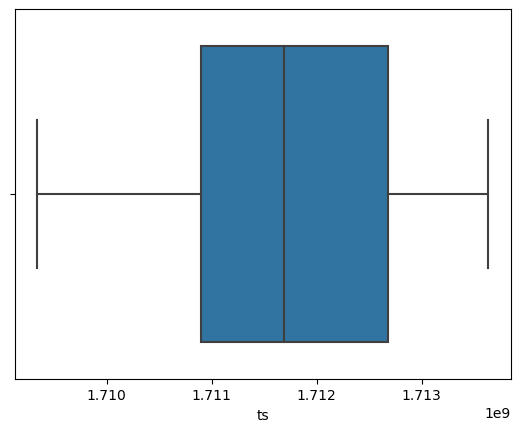

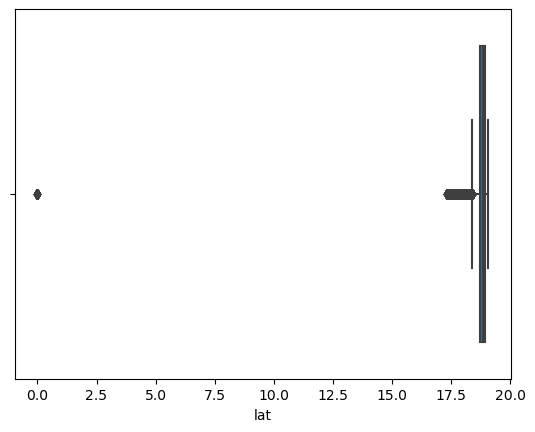

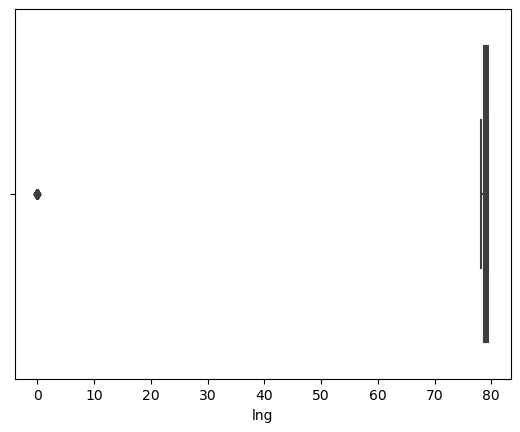

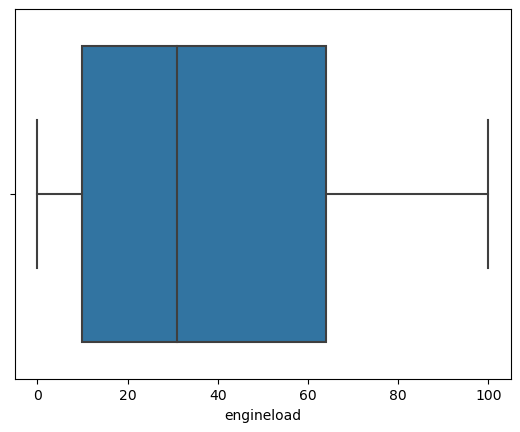

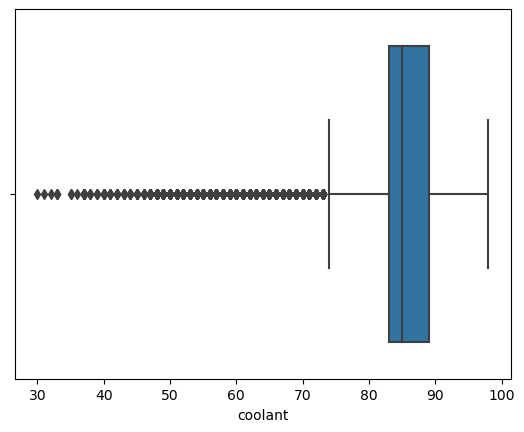

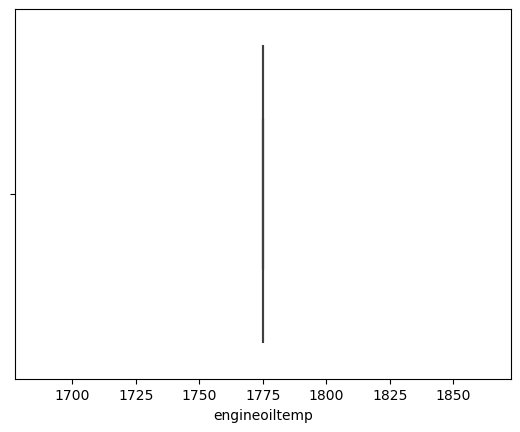

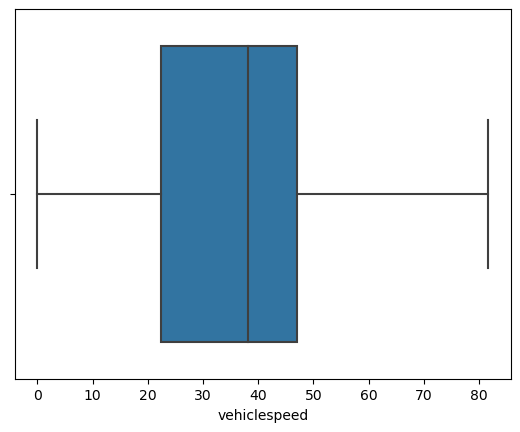

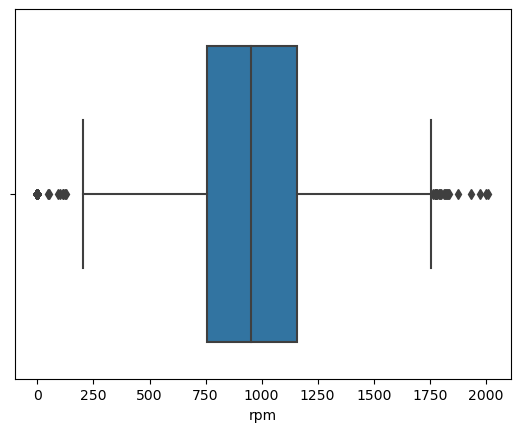

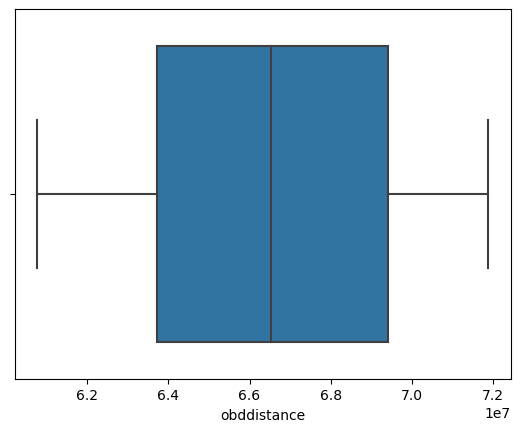

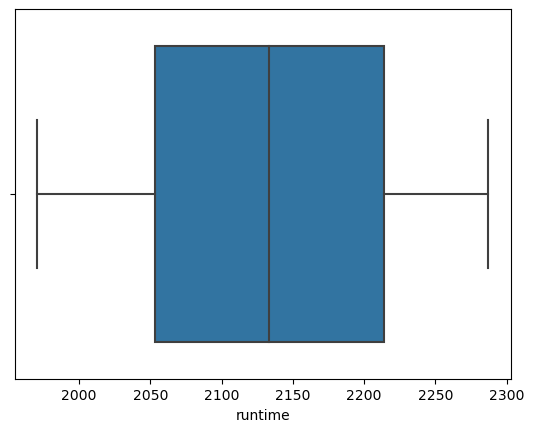

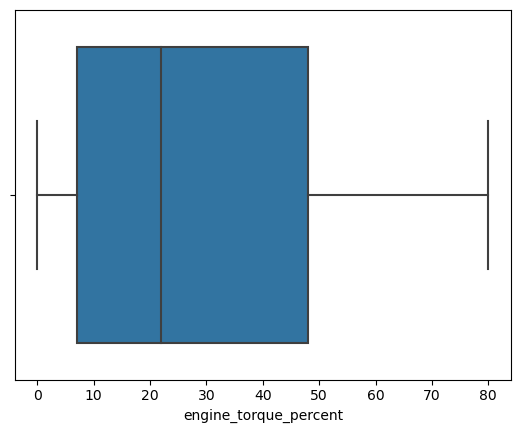

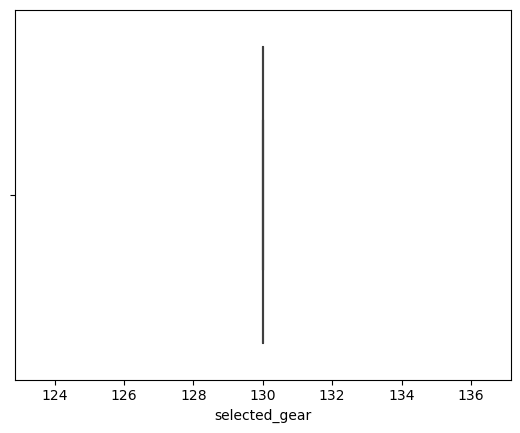

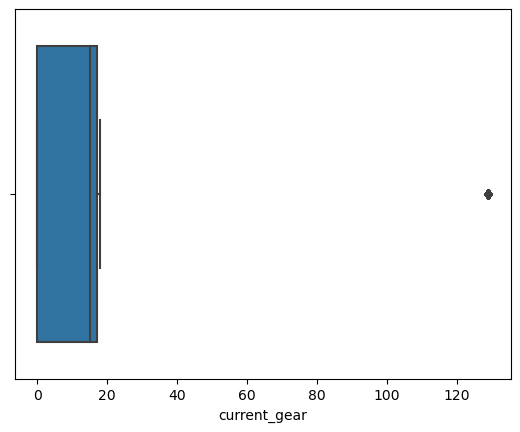

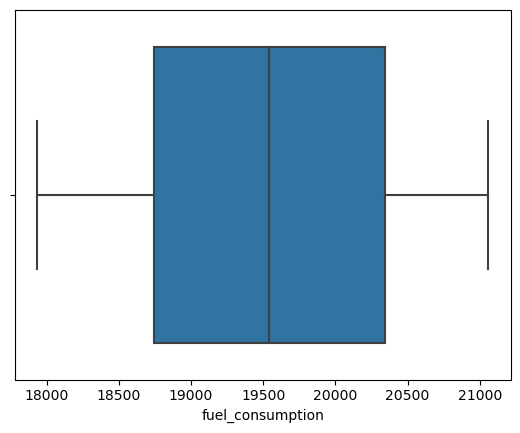

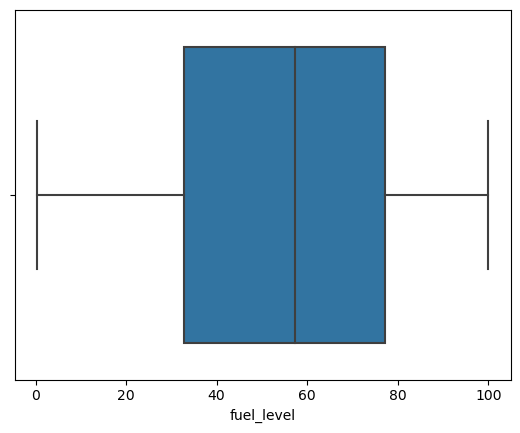

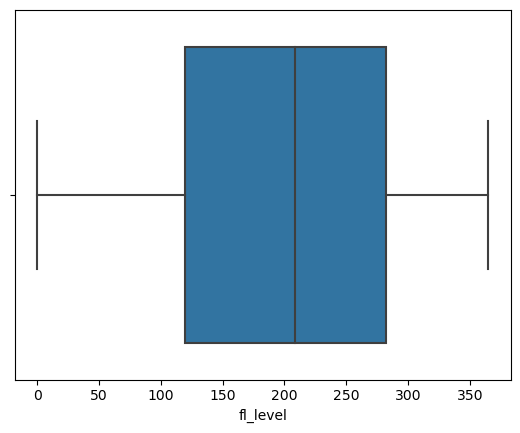

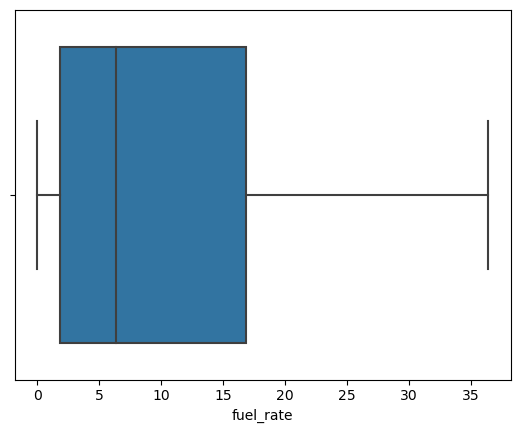

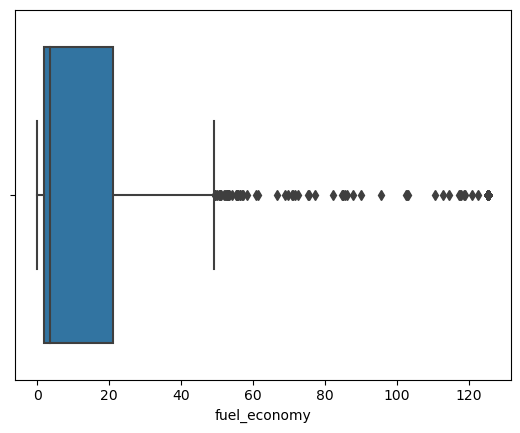

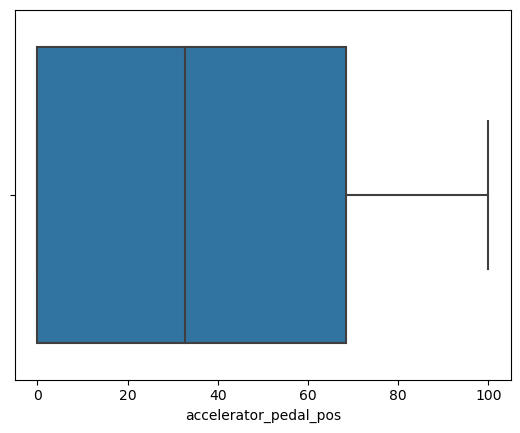

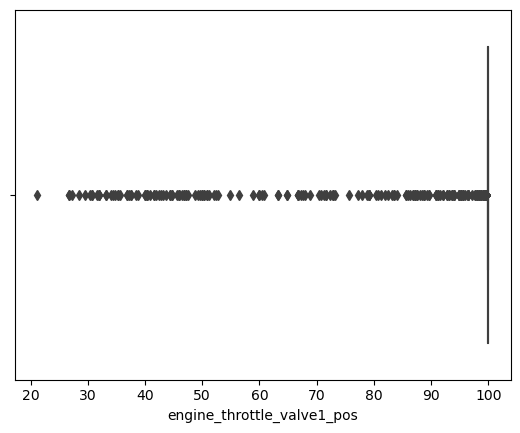

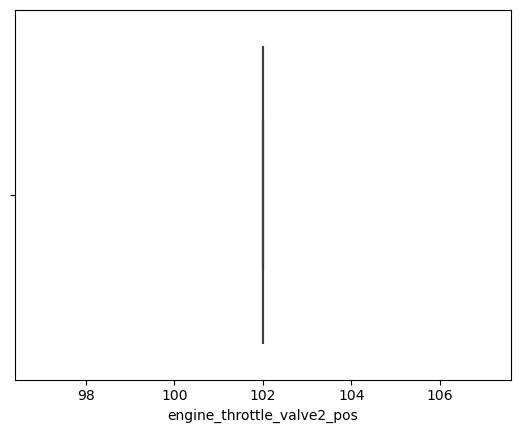

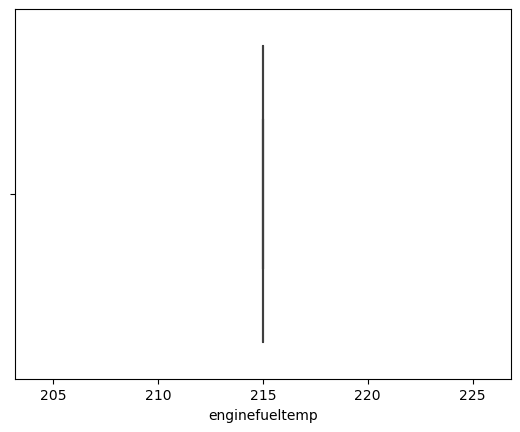

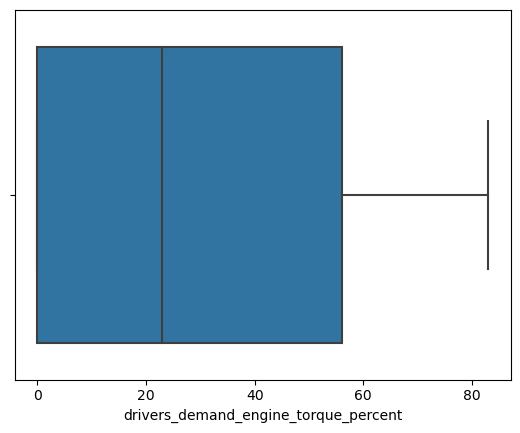

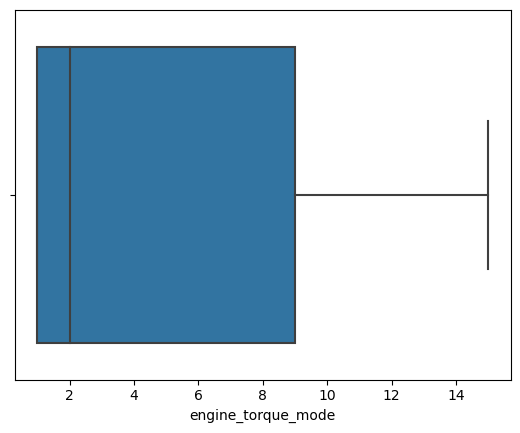

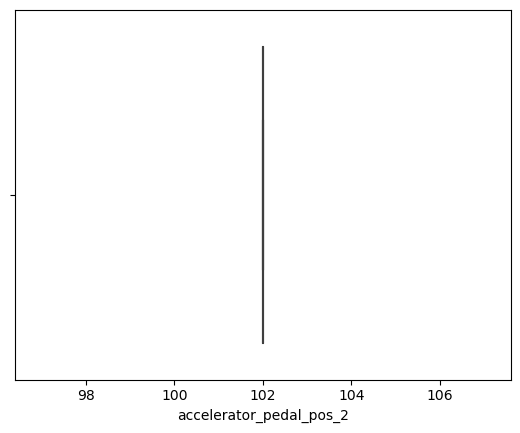

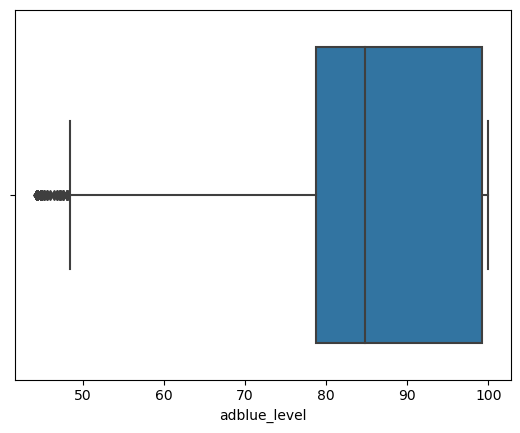

In [29]:
for i in numeric_columns:
    sns.boxplot(x=i, data =cleaned_data)
    plt.show()

### we can see that in the above cell there are some outliers present in 8 columns mentioned below:

### lat,lng,coolant,rmp,current_gear,fuel_economy,engine_throttle_valvel_pos,adblue_level

In [30]:
# Handling Outliers 
#lat column
Q1 = cleaned_data["lat"].quantile(0.25)
Q3 = cleaned_data["lat"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.lat<lower_value) | (cleaned_data.lat>higher_value)]

cleaned_data["lat"] = np.where(cleaned_data["lat"]<lower_value, lower_value, cleaned_data["lat"])
cleaned_data["lat"] = np.where(cleaned_data["lat"]>higher_value, higher_value, cleaned_data["lat"])

In [31]:
#lng column
Q1 = cleaned_data["lng"].quantile(0.25)
Q3 = cleaned_data["lng"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.lng<lower_value) | (cleaned_data.lng>higher_value)]

cleaned_data["lng"] = np.where(cleaned_data["lng"]<lower_value, lower_value, cleaned_data["lng"])
cleaned_data["lng"] = np.where(cleaned_data["lng"]>higher_value, higher_value, cleaned_data["lng"])

In [32]:
#coolantcolumn
Q1 = cleaned_data["coolant"].quantile(0.25)
Q3 = cleaned_data["coolant"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.coolant<lower_value) | (cleaned_data.coolant>higher_value)]

cleaned_data["coolant"] = np.where(cleaned_data["coolant"]<lower_value, lower_value, cleaned_data["coolant"])
cleaned_data["coolant"] = np.where(cleaned_data["coolant"]>higher_value, higher_value, cleaned_data["coolant"])

In [33]:
#rpm column
Q1 = cleaned_data["rpm"].quantile(0.25)
Q3 = cleaned_data["rpm"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.rpm<lower_value) | (cleaned_data.rpm>higher_value)]

cleaned_data["rpm"] = np.where(cleaned_data["rpm"]<lower_value, lower_value, cleaned_data["rpm"])
cleaned_data["rpm"] = np.where(cleaned_data["rpm"]>higher_value, higher_value, cleaned_data["rpm"])

In [34]:
#current_gear column
Q1 = cleaned_data["current_gear"].quantile(0.25)
Q3 = cleaned_data["current_gear"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.current_gear<lower_value) | (cleaned_data.current_gear>higher_value)]

cleaned_data["current_gear"] = np.where(cleaned_data["current_gear"]<lower_value, lower_value, cleaned_data["current_gear"])
cleaned_data["current_gear"] = np.where(cleaned_data["current_gear"]>higher_value, higher_value, cleaned_data["current_gear"])

In [35]:
#fuel_economy column
Q1 = cleaned_data["fuel_economy"].quantile(0.25)
Q3 = cleaned_data["fuel_economy"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.fuel_economy<lower_value) | (cleaned_data.fuel_economy>higher_value)]

cleaned_data["fuel_economy"] = np.where(cleaned_data["fuel_economy"]<lower_value, lower_value, cleaned_data["fuel_economy"])
cleaned_data["fuel_economy"] = np.where(cleaned_data["fuel_economy"]>higher_value, higher_value, cleaned_data["fuel_economy"])

In [36]:
#engine_throttle_valve1_pos column
Q1 = cleaned_data["engine_throttle_valve1_pos"].quantile(0.25)
Q3 = cleaned_data["engine_throttle_valve1_pos"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.engine_throttle_valve1_pos<lower_value) | (cleaned_data.engine_throttle_valve1_pos>higher_value)]

cleaned_data["engine_throttle_valve1_pos"] = np.where(cleaned_data["engine_throttle_valve1_pos"]<lower_value, lower_value, cleaned_data["engine_throttle_valve1_pos"])
cleaned_data["engine_throttle_valve1_pos"] = np.where(cleaned_data["engine_throttle_valve1_pos"]>higher_value, higher_value, cleaned_data["engine_throttle_valve1_pos"])

In [37]:
#adblue_level column
Q1 = cleaned_data["adblue_level"].quantile(0.25)
Q3 = cleaned_data["adblue_level"].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 - (1.5 * IQR)
higher_value = Q3 + (1.5 * IQR)
cleaned_data[(cleaned_data.adblue_level<lower_value) | (cleaned_data.adblue_level>higher_value)]

cleaned_data["adblue_level"] = np.where(cleaned_data["adblue_level"]<lower_value, lower_value, cleaned_data["adblue_level"])
cleaned_data["adblue_level"] = np.where(cleaned_data["adblue_level"]>higher_value, higher_value, cleaned_data["adblue_level"])


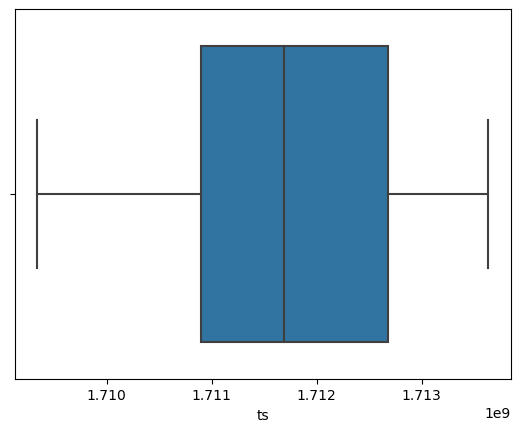

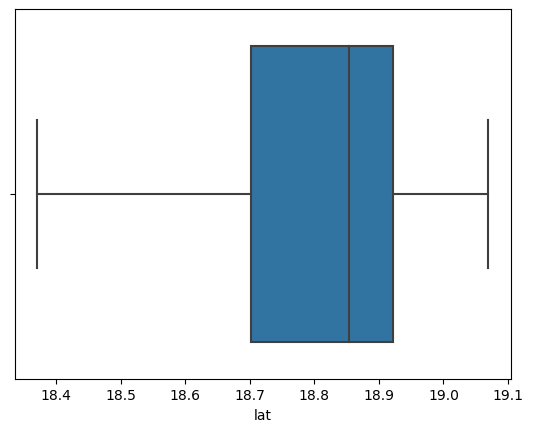

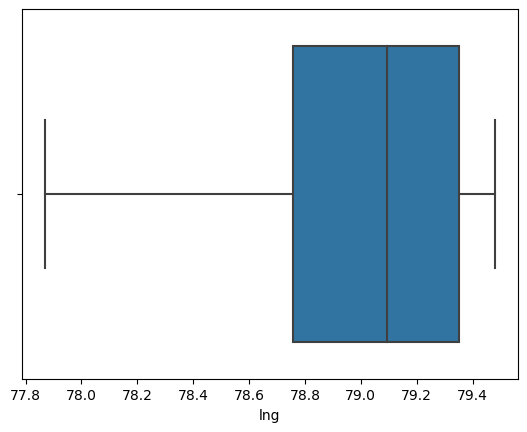

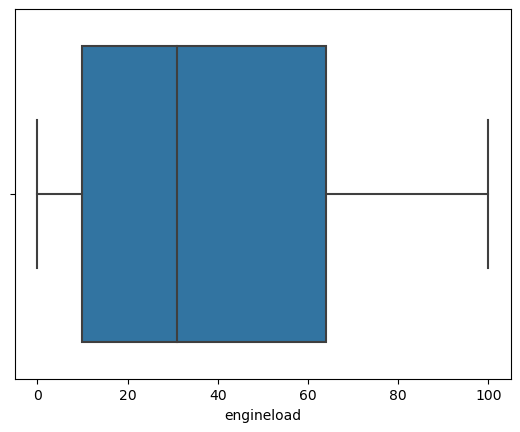

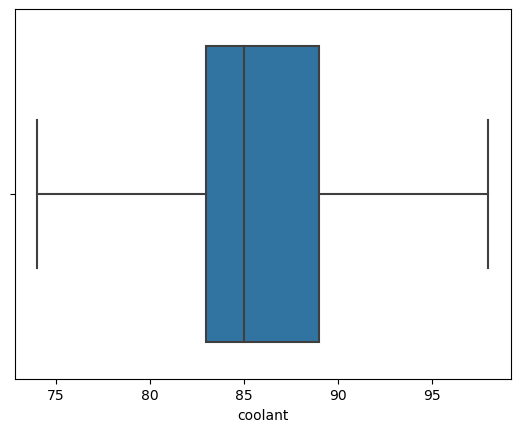

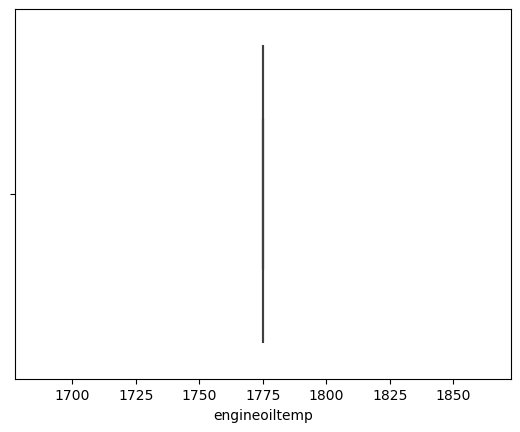

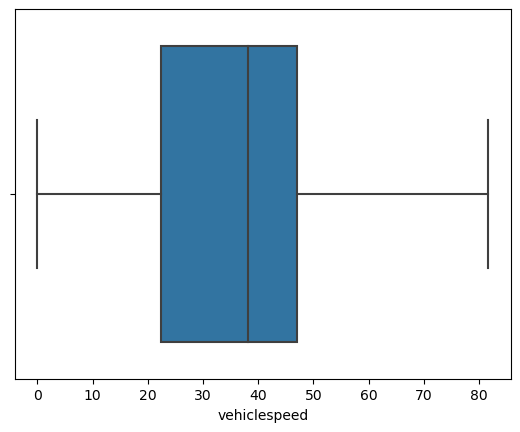

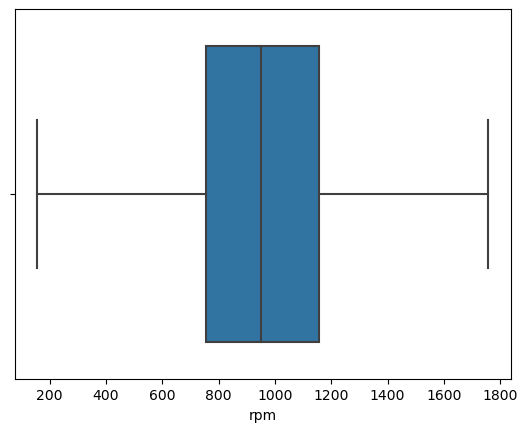

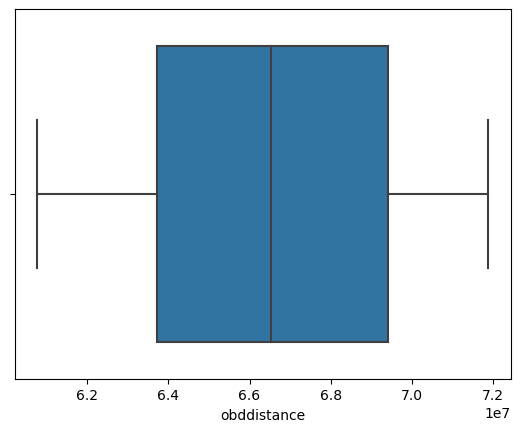

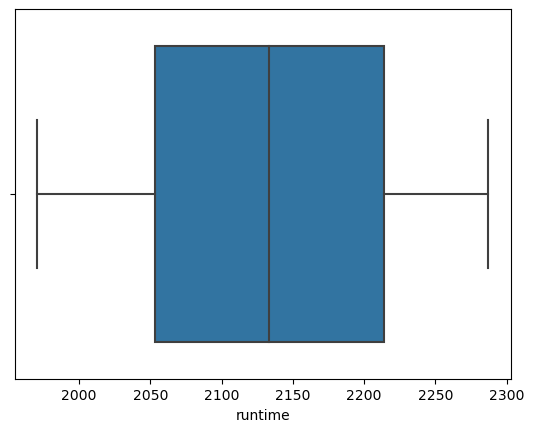

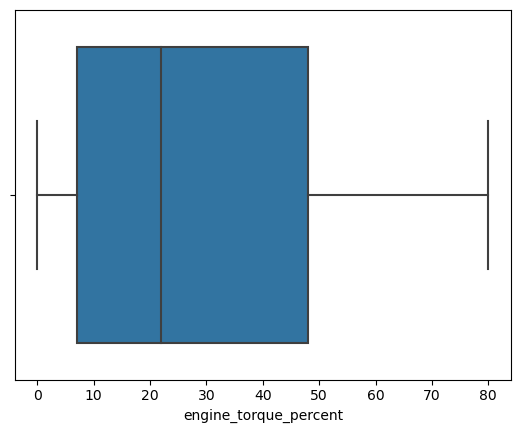

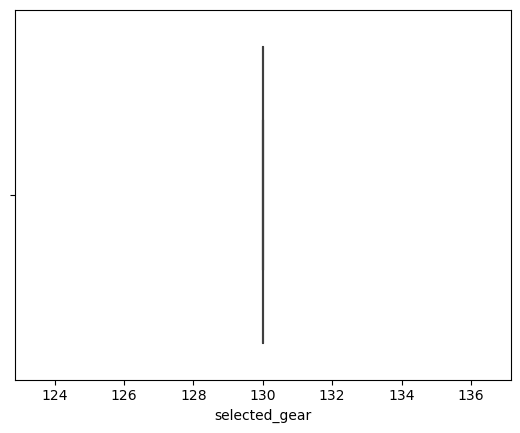

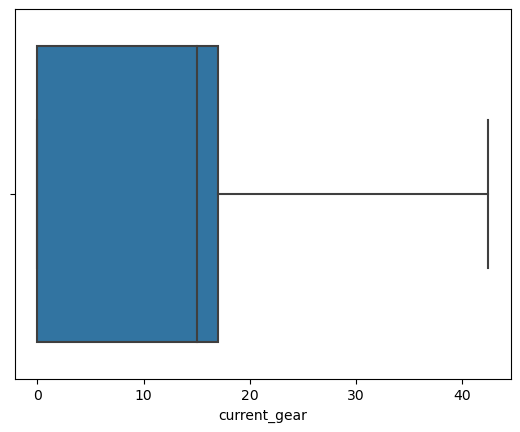

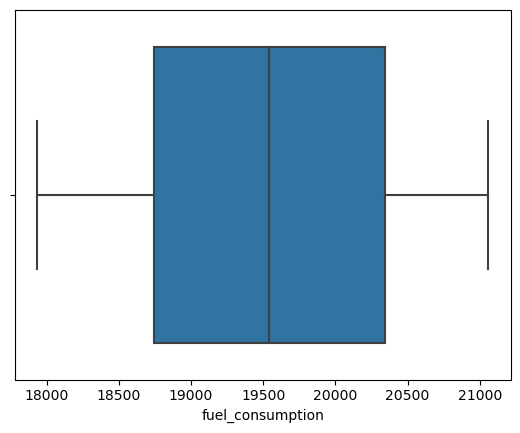

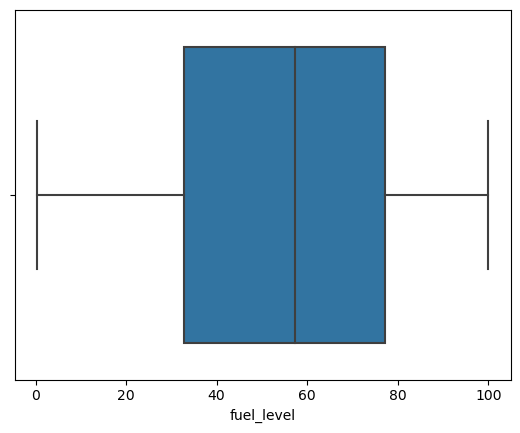

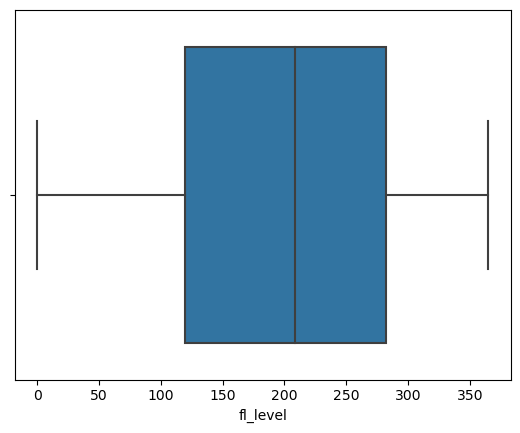

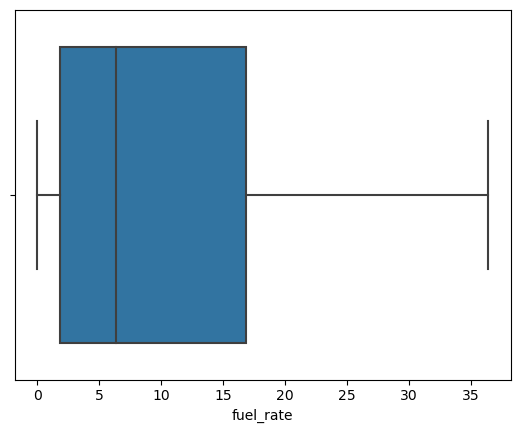

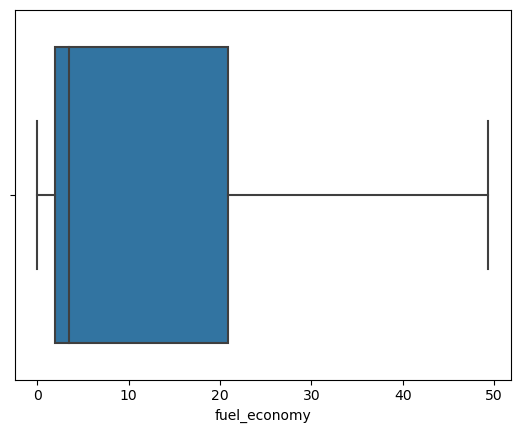

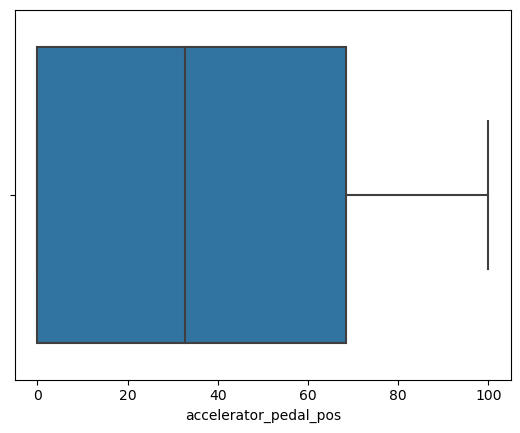

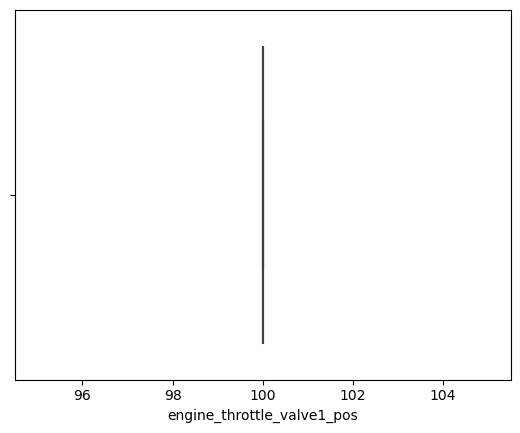

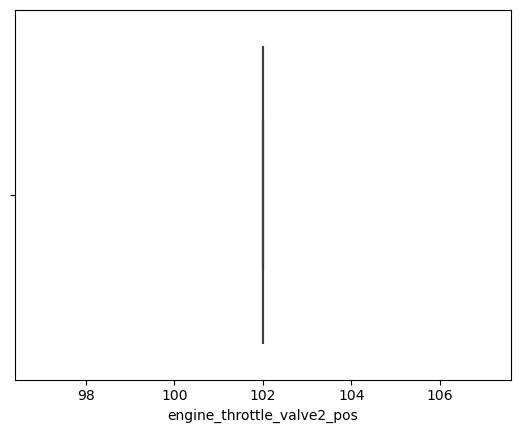

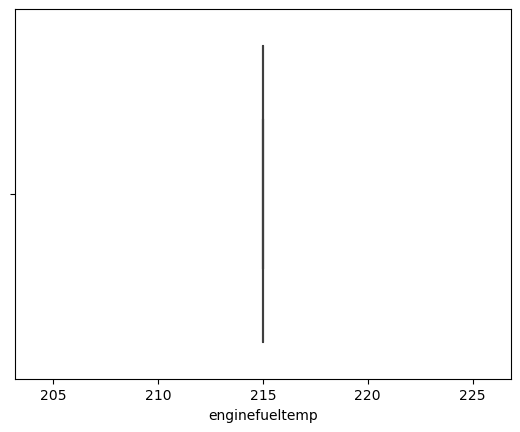

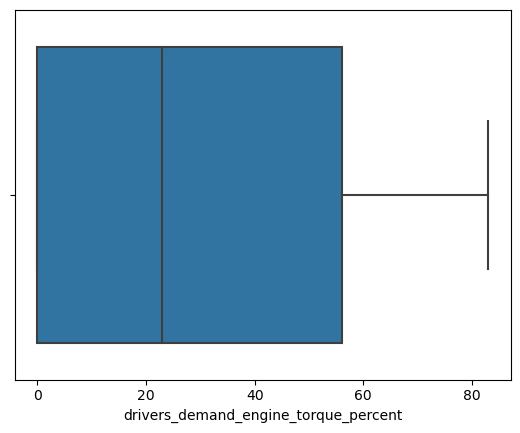

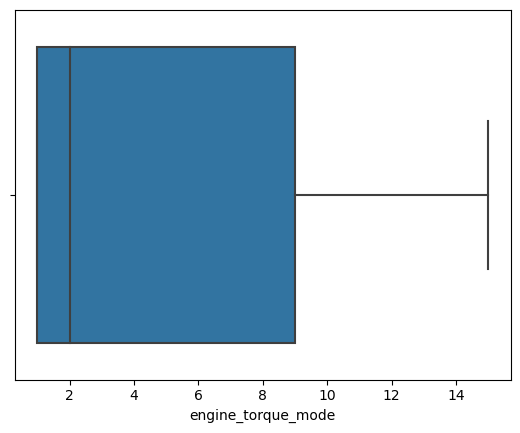

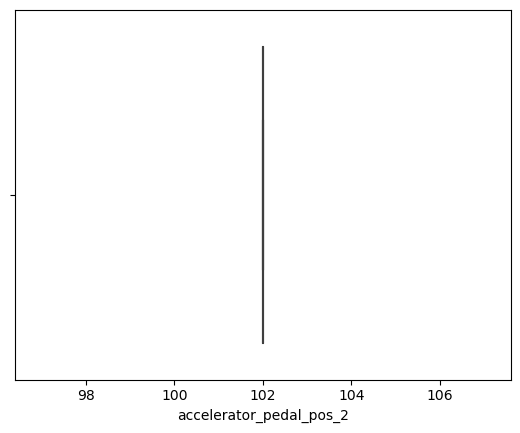

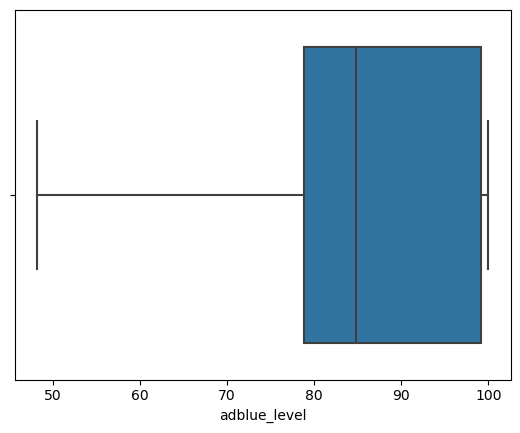

In [38]:
for i in numeric_columns:
    sns.boxplot(x=i, data =cleaned_data)
    plt.show()

In [39]:
numeric_columns = cleaned_data.select_dtypes(include="number") # updating the numeric caloumns after removing outliers
categorical_columns = cleaned_data.select_dtypes(include="object") # updating the numeric caloumns after removing outliers

### all outliers have been capped (replaced / covered)

# 3.Exploratory data analysis:

## heatmap

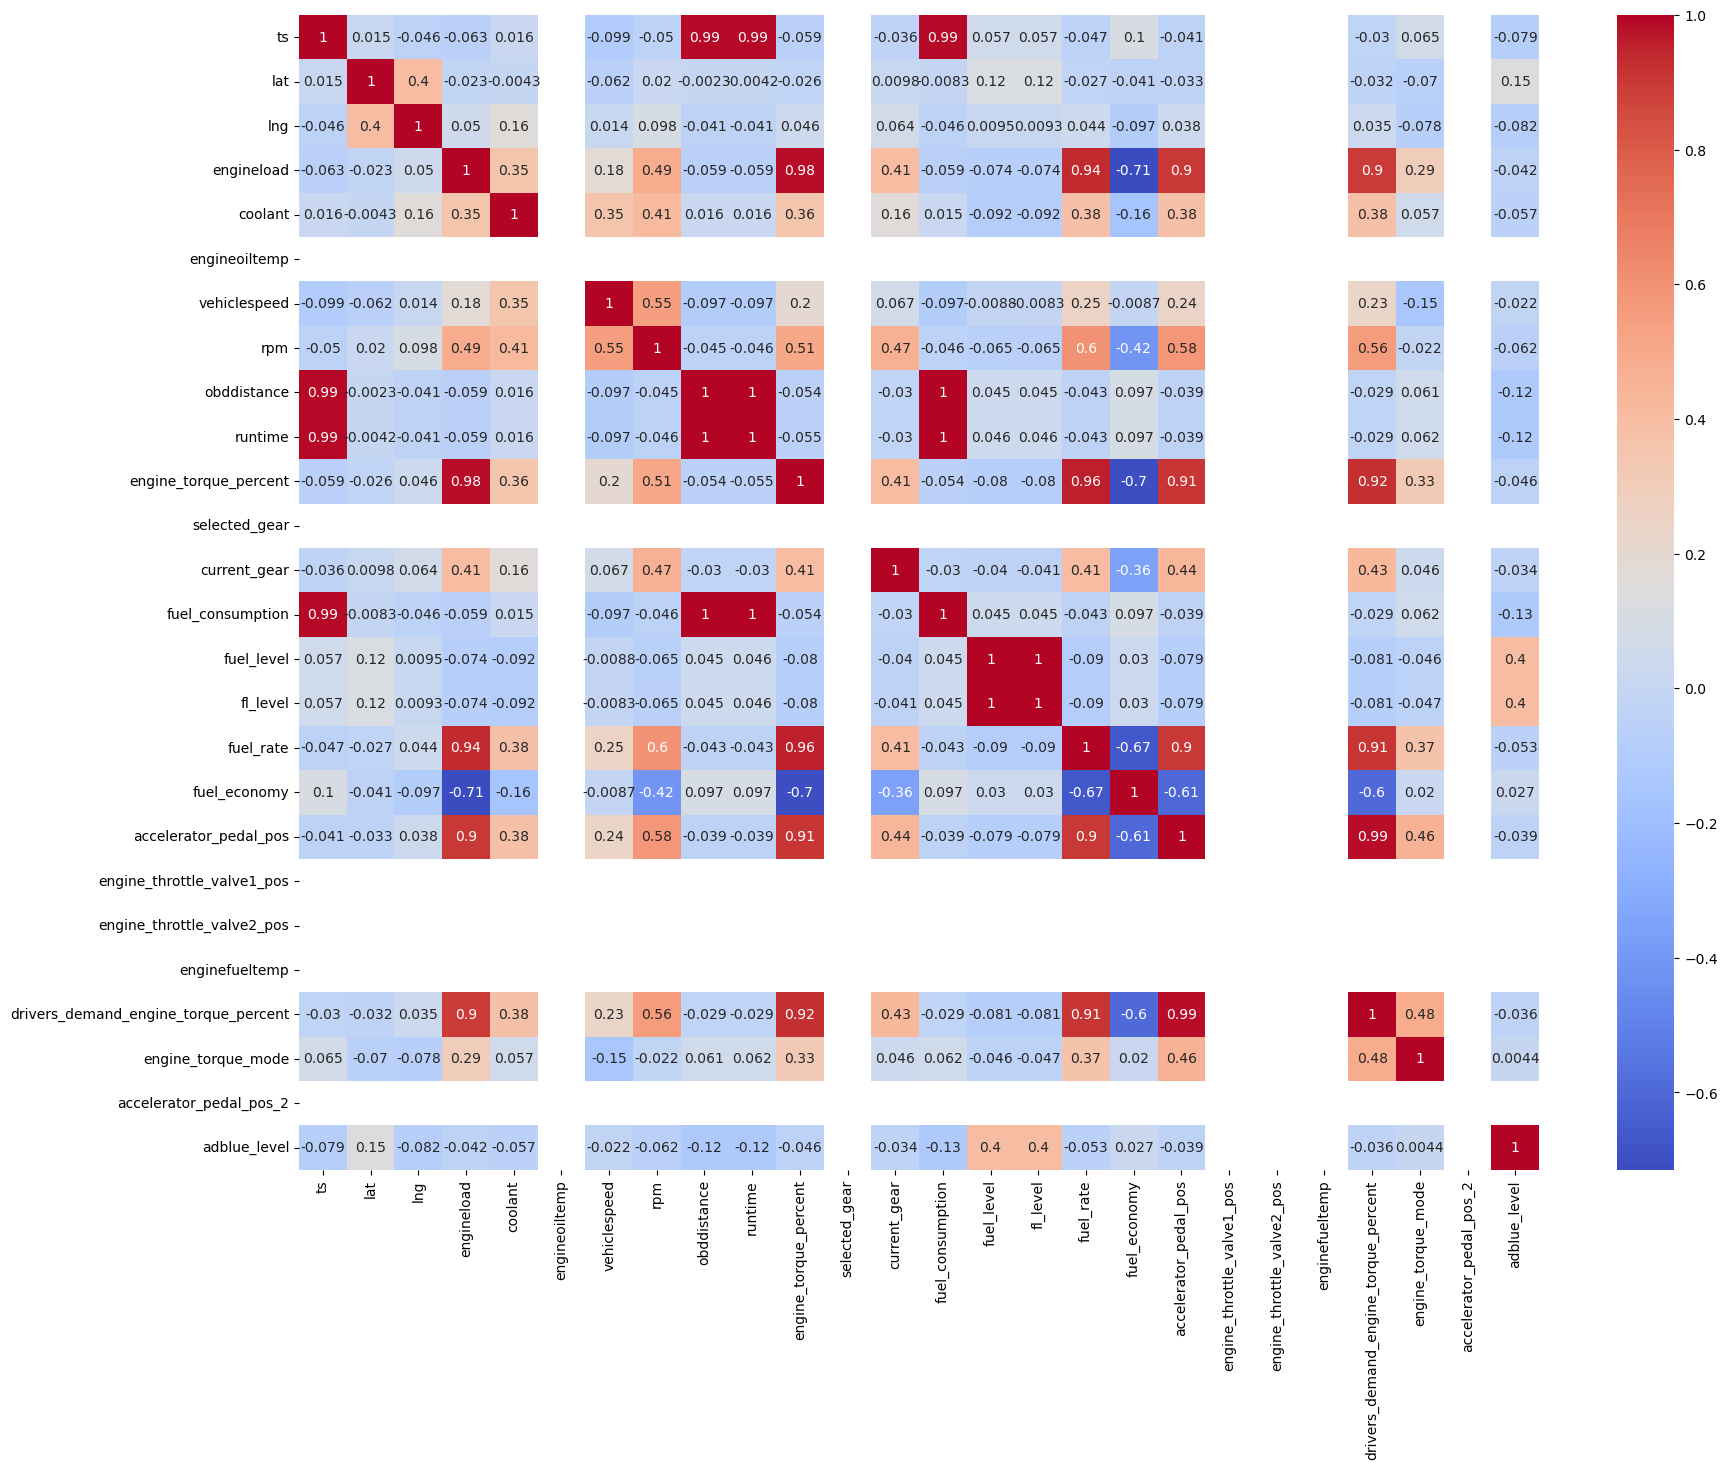

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(numeric_columns.corr(), annot =True, cmap="coolwarm")
plt.show()

In [41]:
#sns.pairplot(cleaned_data)
#plt.show()

### Perform univariate analysis on numerical and categorical features.

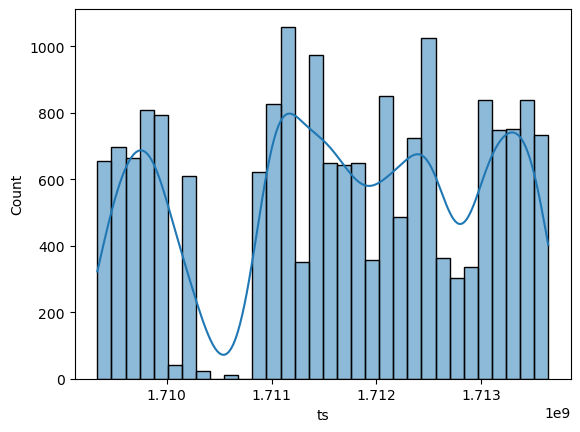

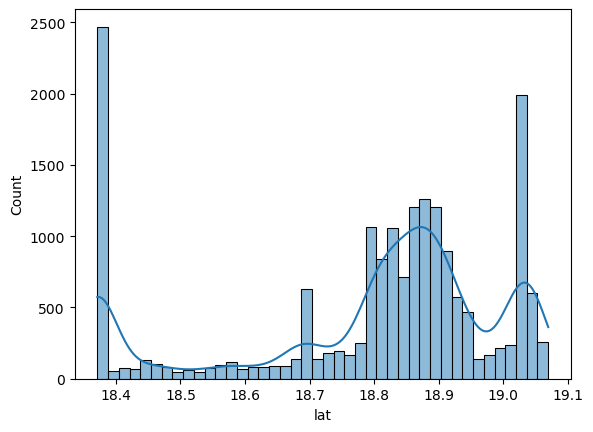

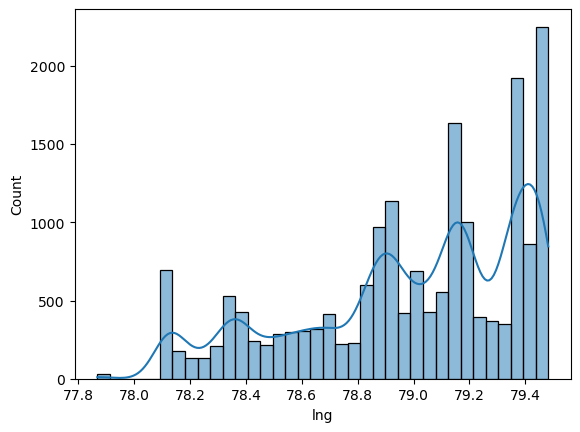

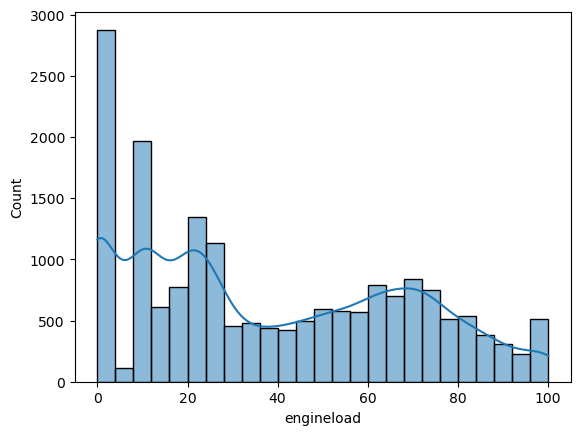

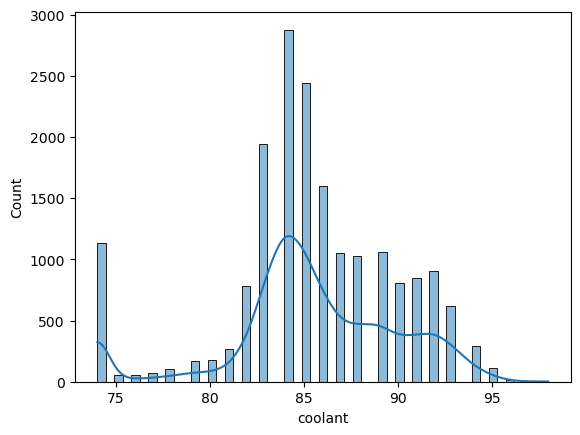

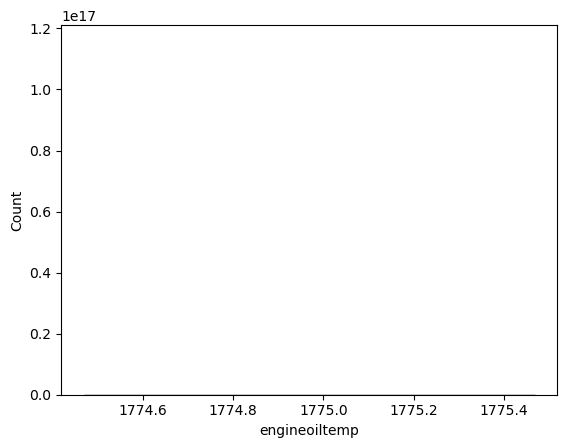

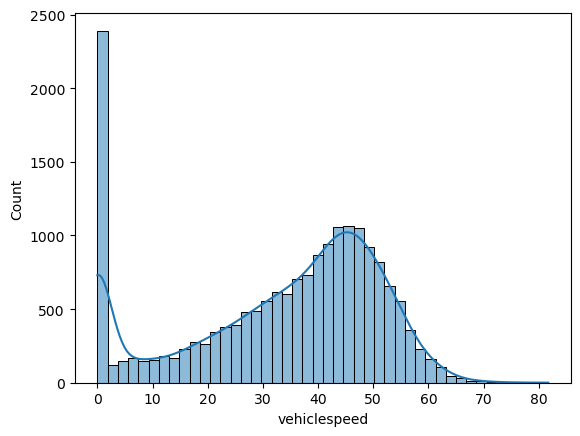

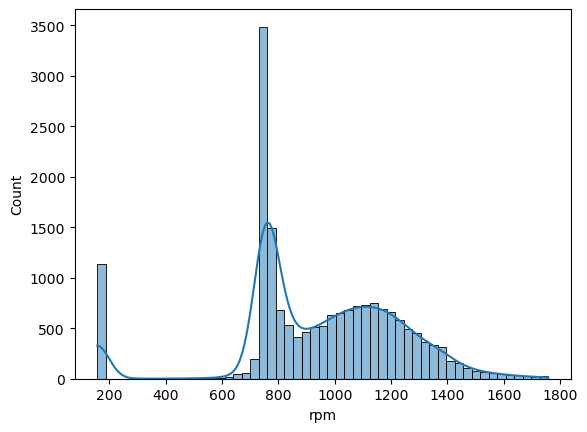

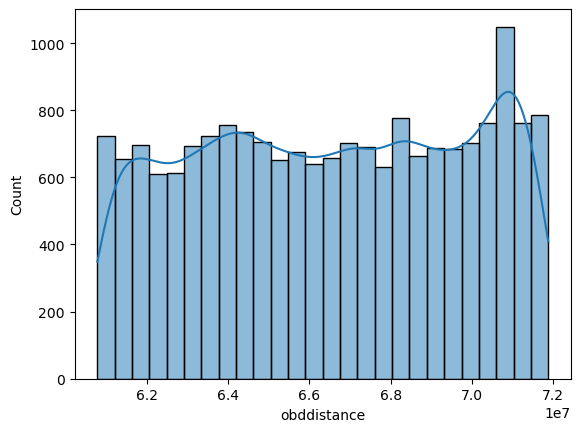

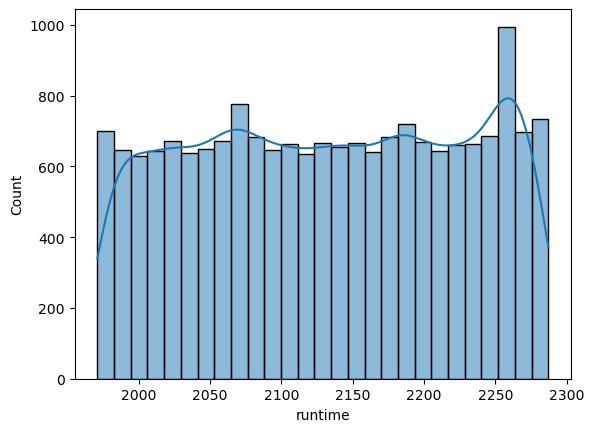

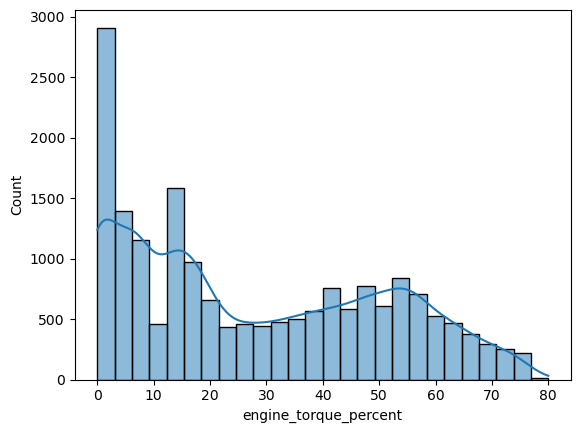

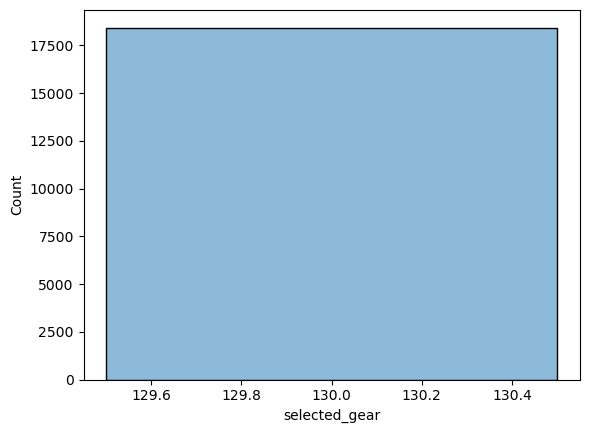

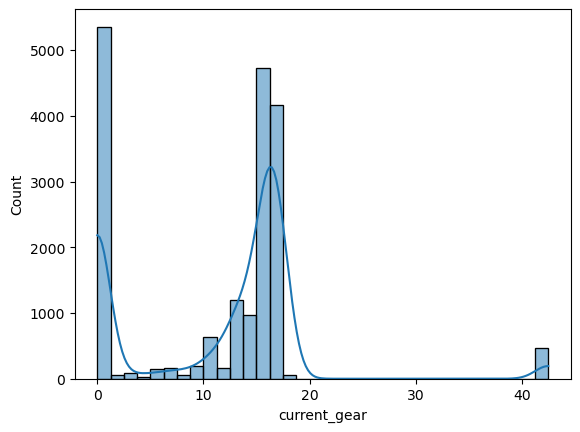

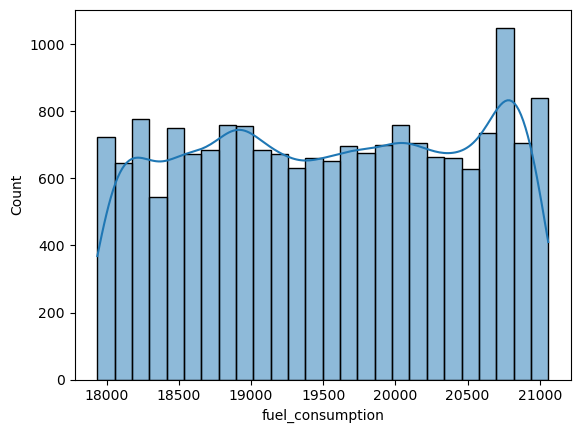

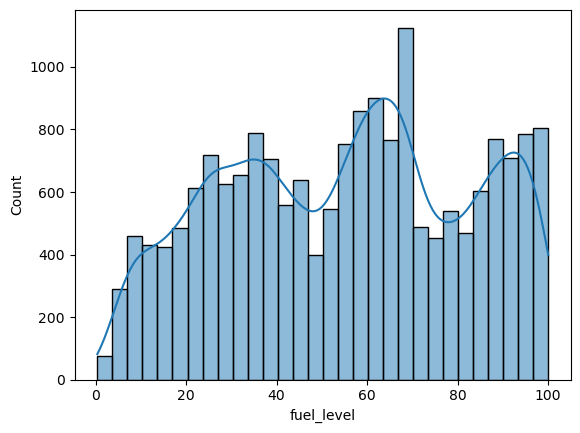

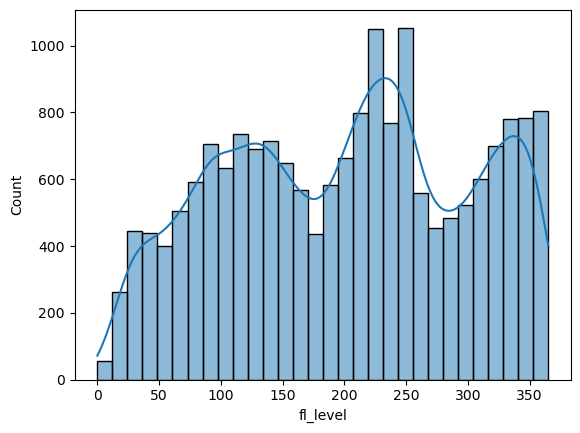

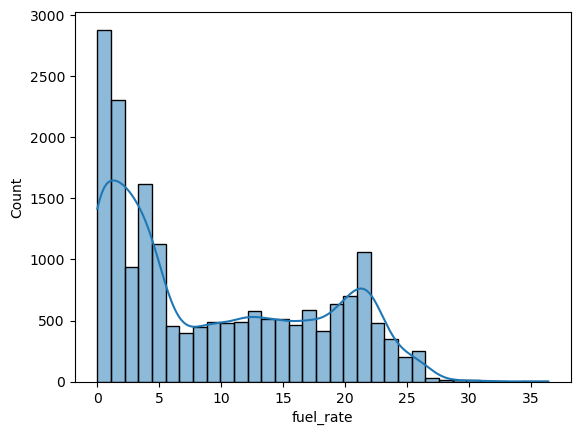

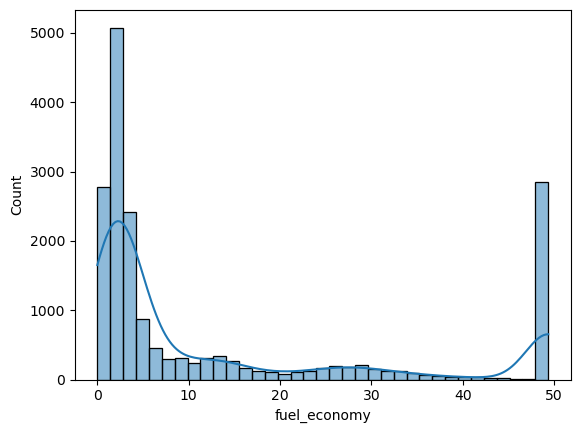

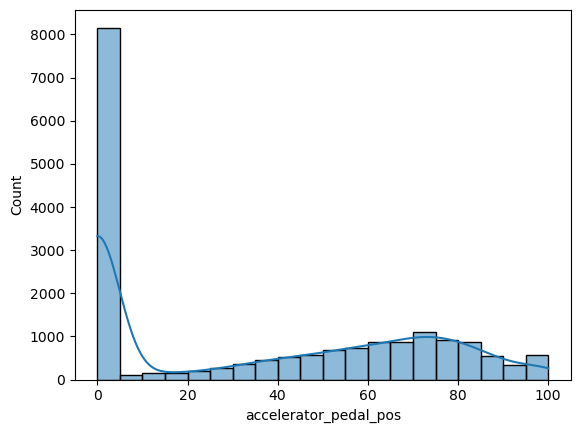

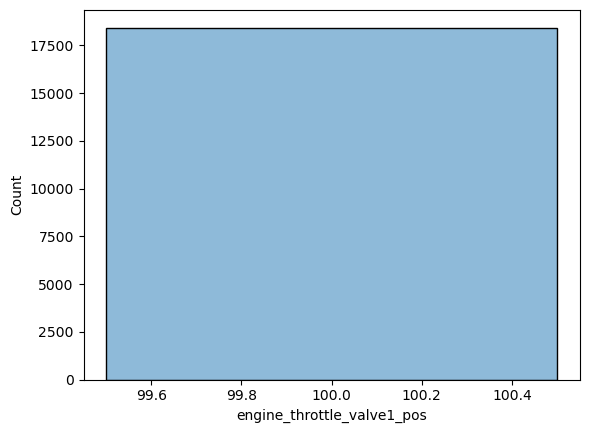

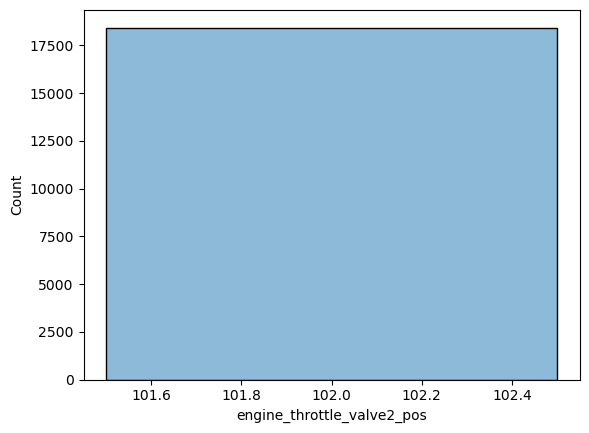

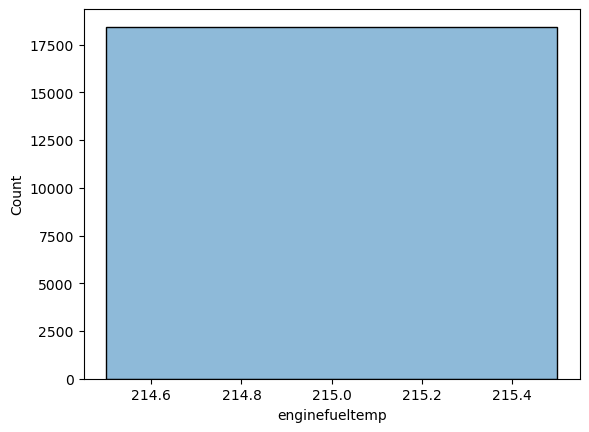

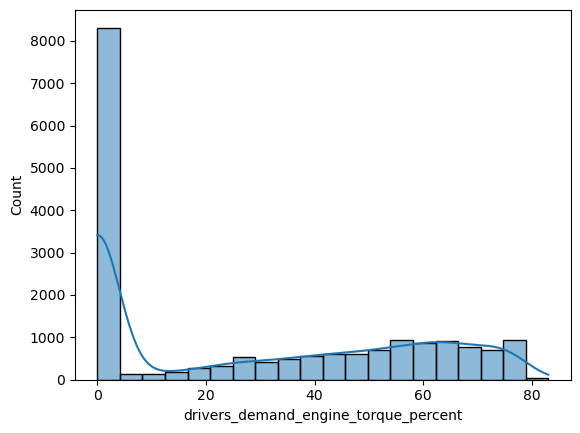

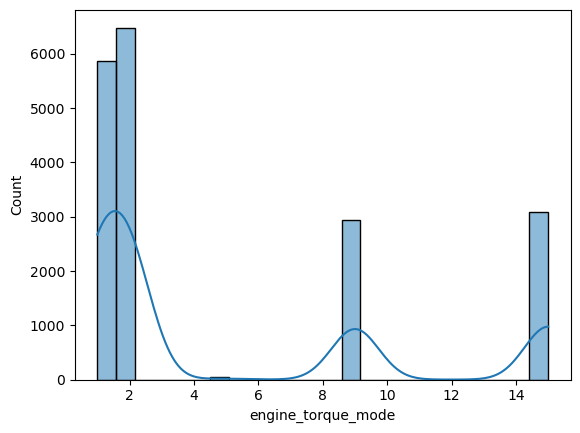

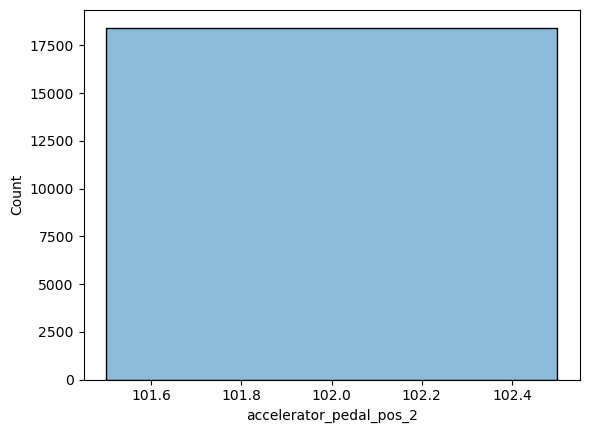

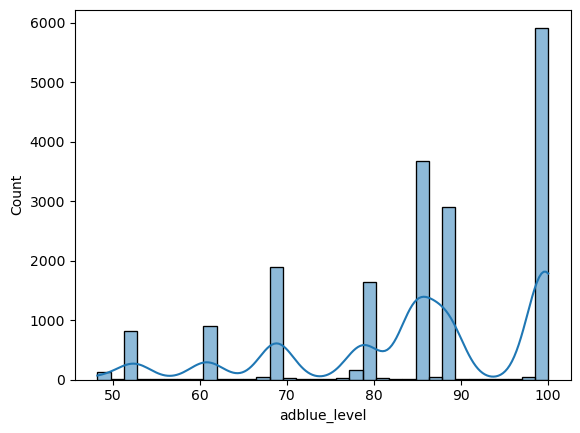

In [42]:
for i in numeric_columns.columns:
    sns.histplot(x=i,data=numeric_columns, kde= True)
    plt.show()

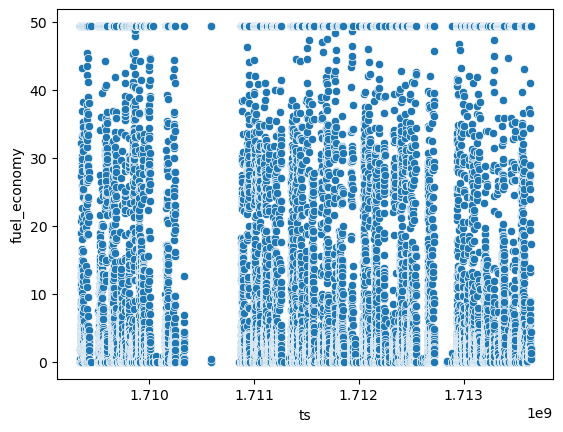

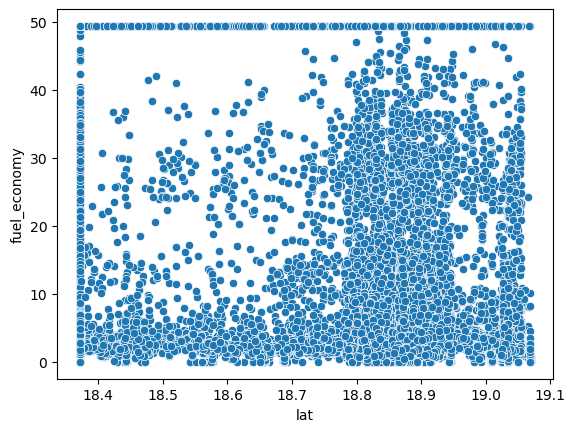

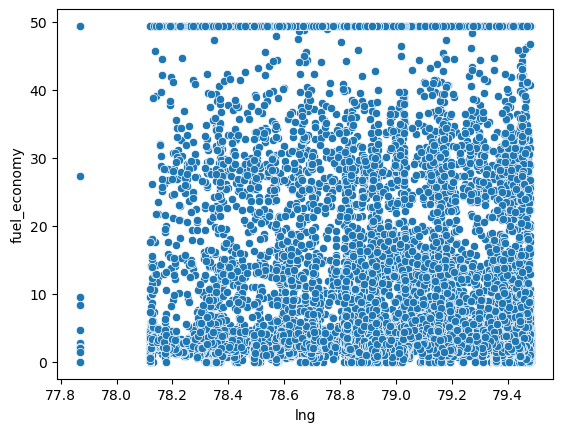

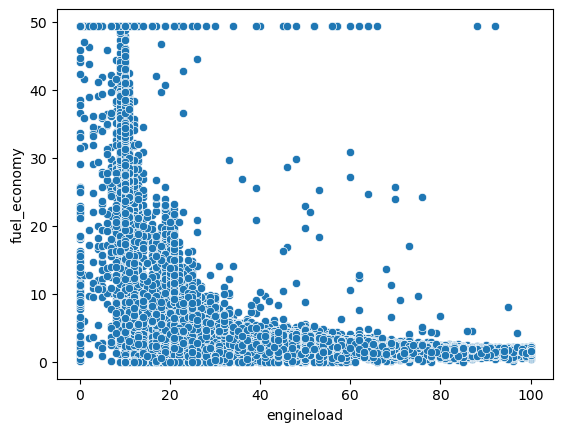

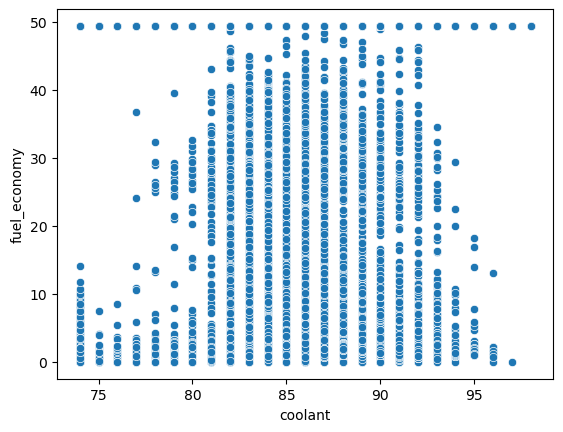

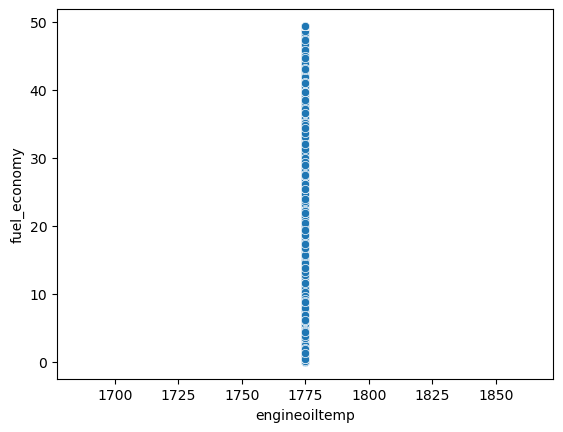

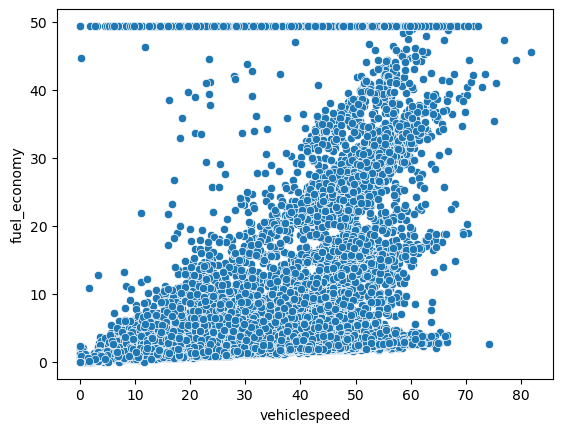

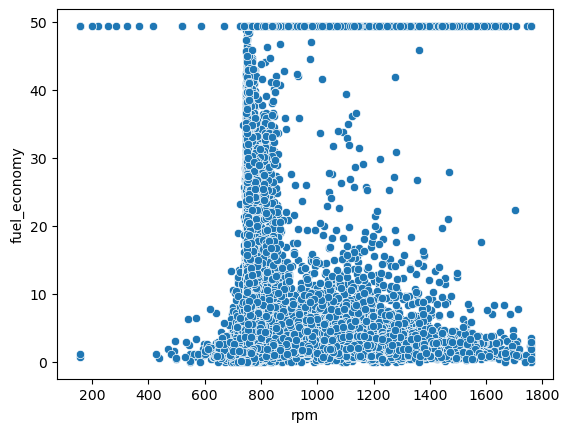

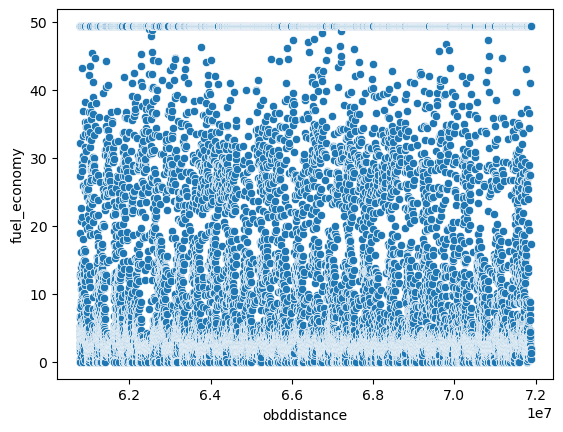

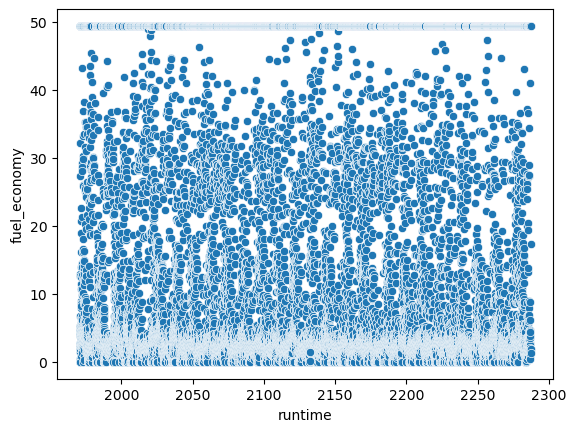

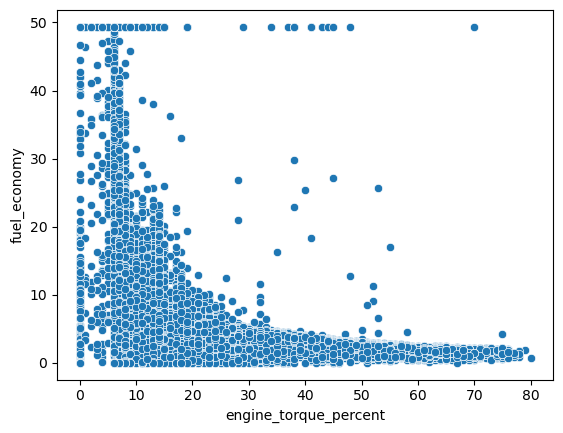

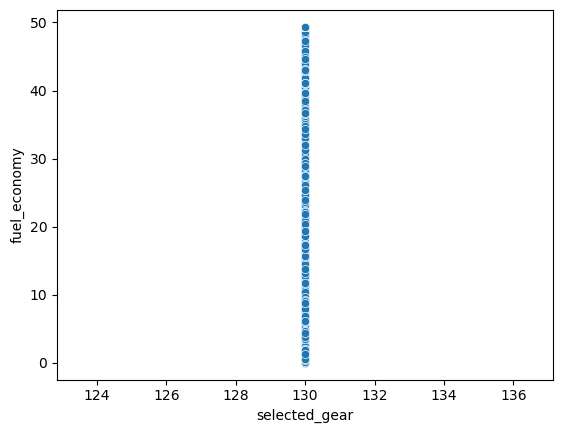

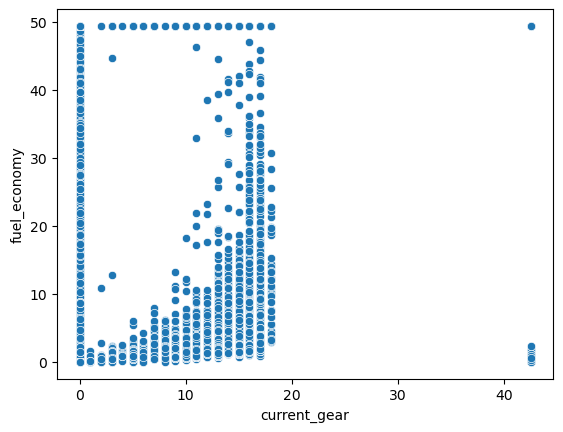

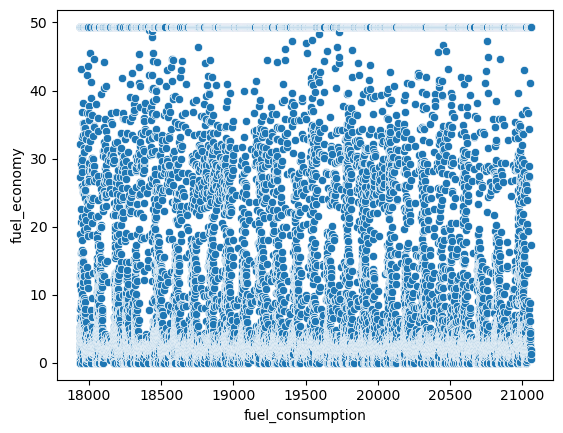

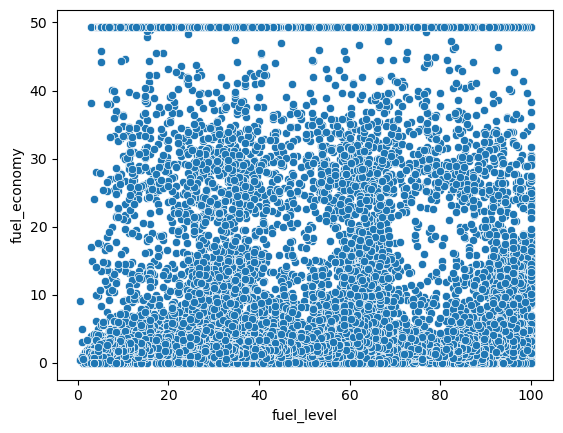

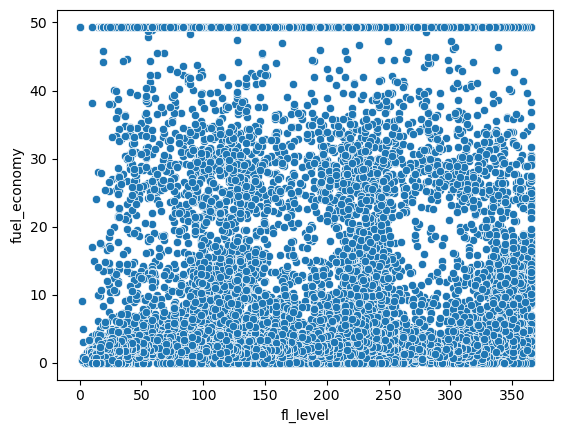

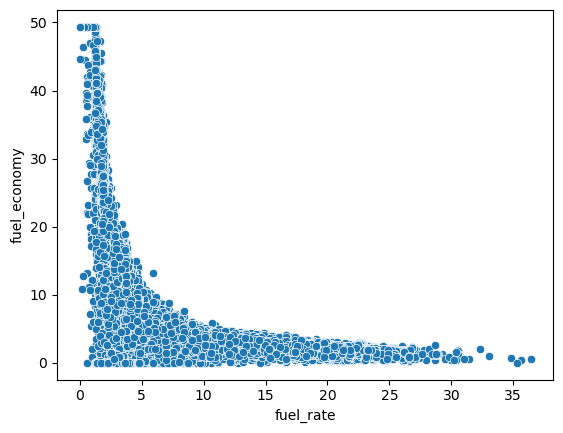

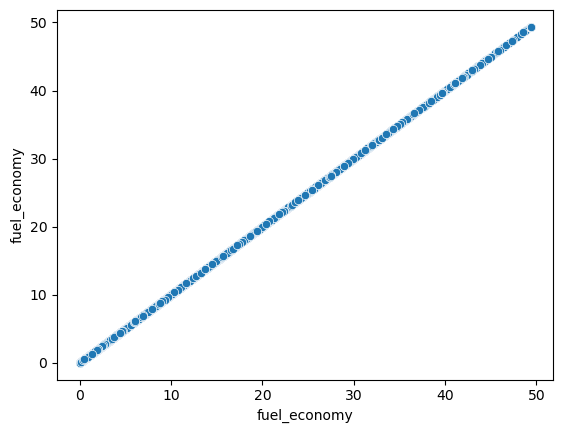

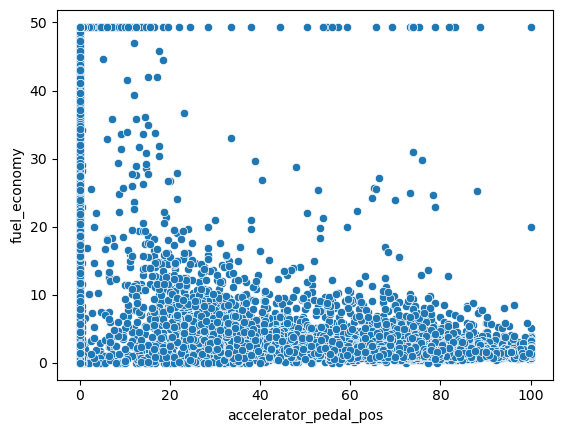

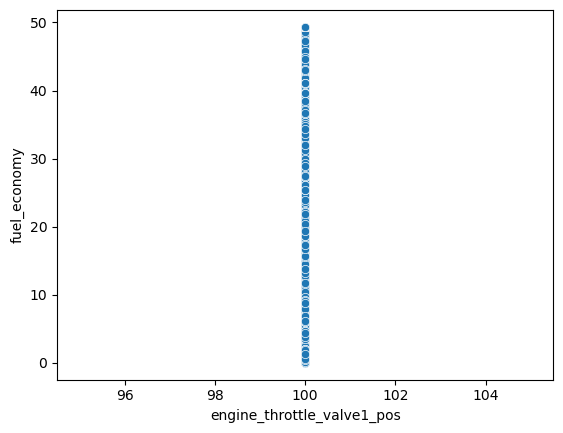

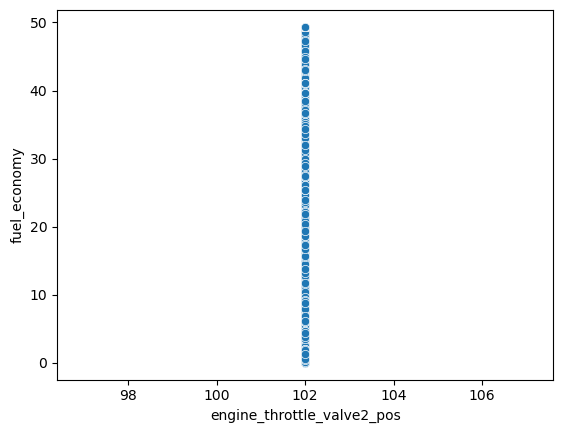

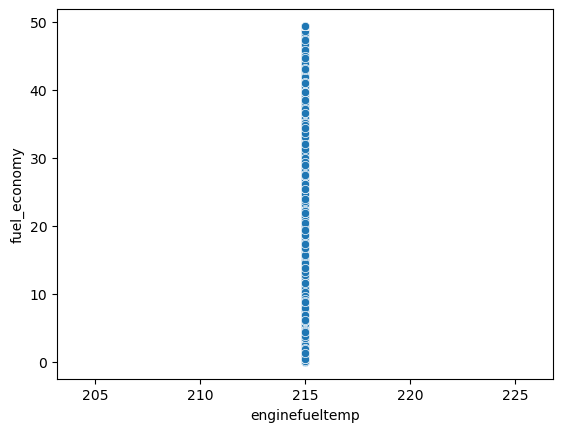

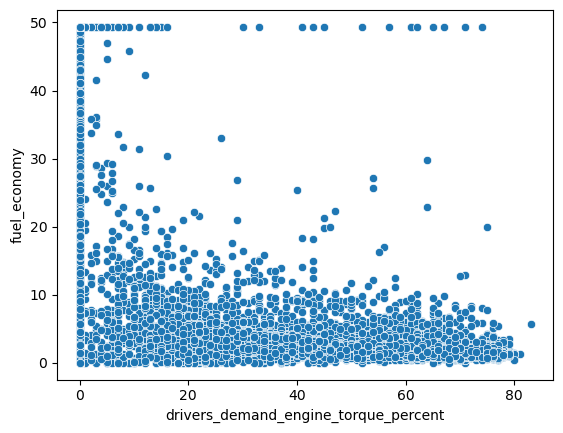

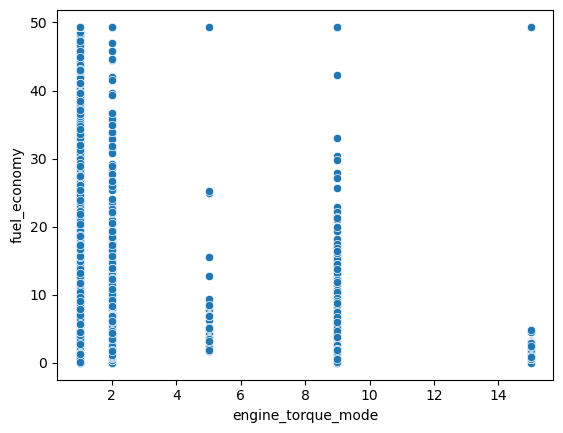

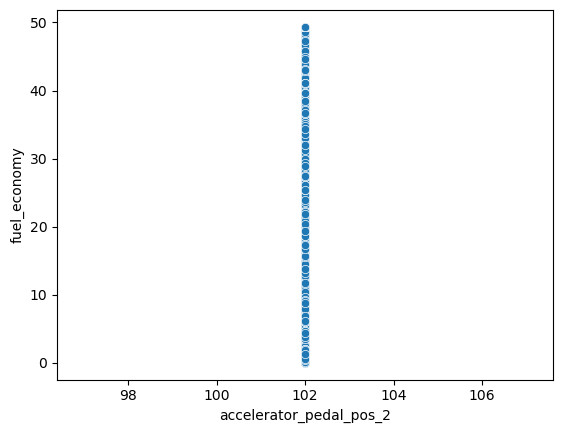

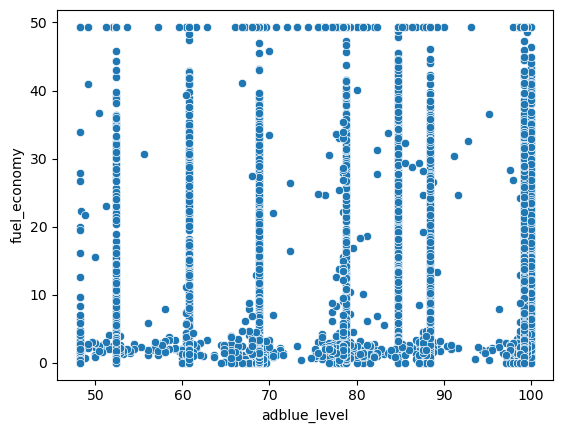

In [43]:
for i in numeric_columns:
    sns.scatterplot(x=i, y = "fuel_economy", data =numeric_columns)
    plt.show()

### inferences for fuel economy

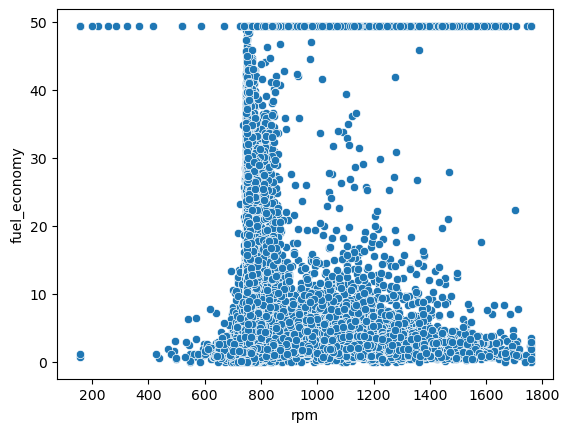

In [44]:
sns.scatterplot(x="rpm", y = "fuel_economy", data =cleaned_data, markers =False )
plt.show()

### In the above cell we can see that at approx 700 rpm fuel economy is high and if the rpm rises from that the fuel economy decreases

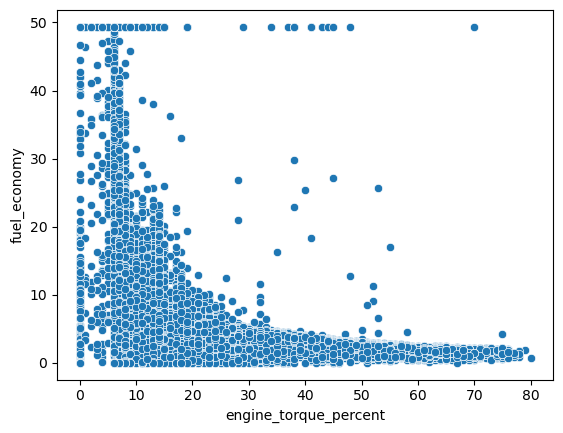

In [45]:
sns.scatterplot(x="engine_torque_percent", y = "fuel_economy", data =cleaned_data)
plt.show()

### fuel economy was high when the engine torque percent is low

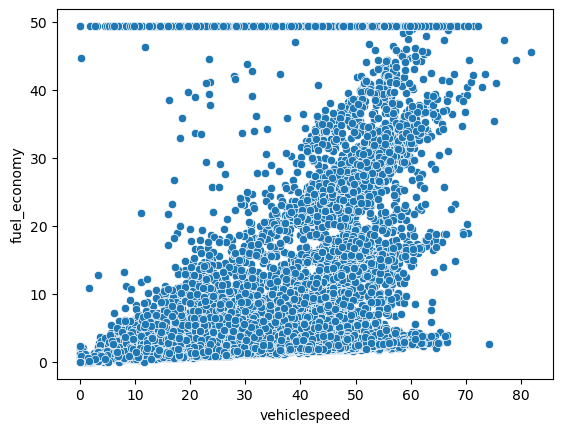

In [46]:
sns.scatterplot(x="vehiclespeed", y = "fuel_economy", data =cleaned_data)
plt.show()

### as the vehicle speed rises the fuel economy goes high

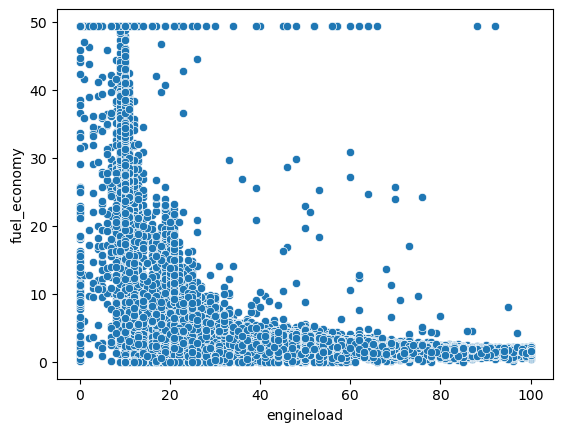

In [47]:
sns.scatterplot(x="engineload", y = "fuel_economy", data =cleaned_data)
plt.show()

### we can see if the engine load is high then the fuel economy is low 

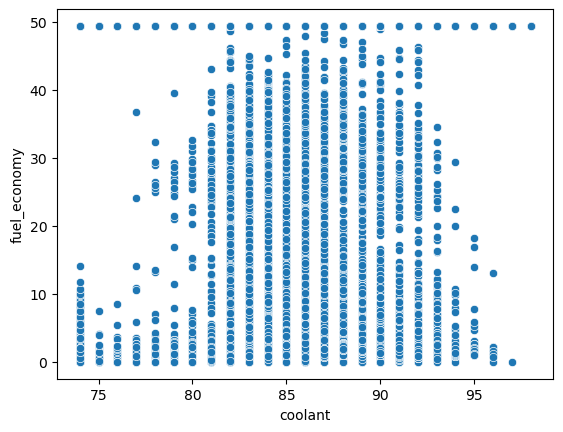

In [48]:
sns.scatterplot(x="coolant", y = "fuel_economy", data =cleaned_data)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


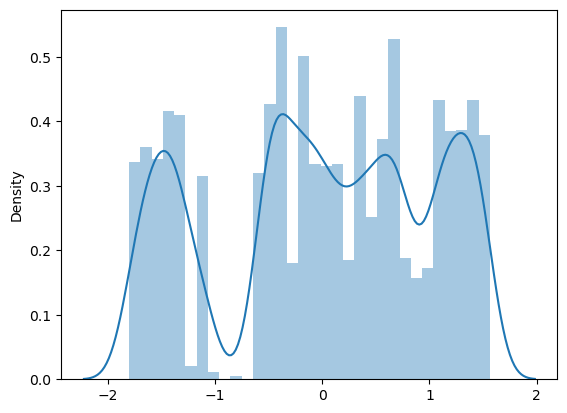

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


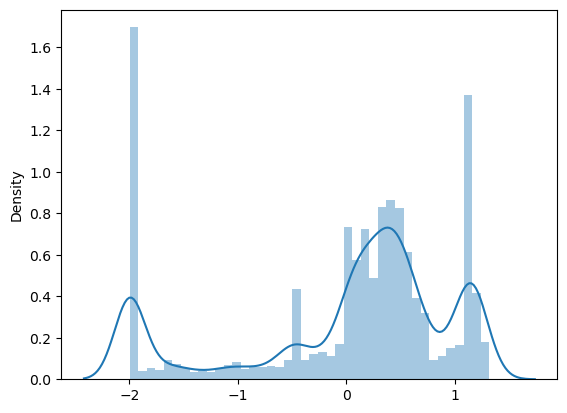

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


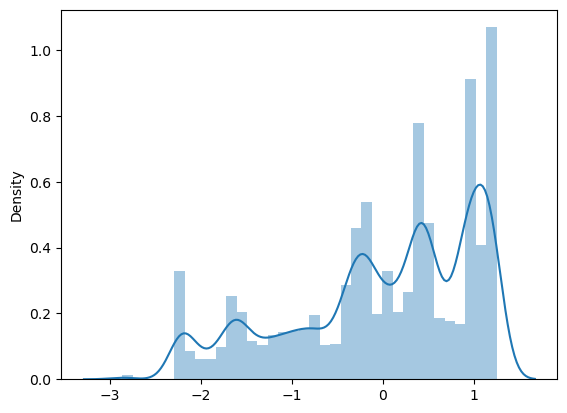

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


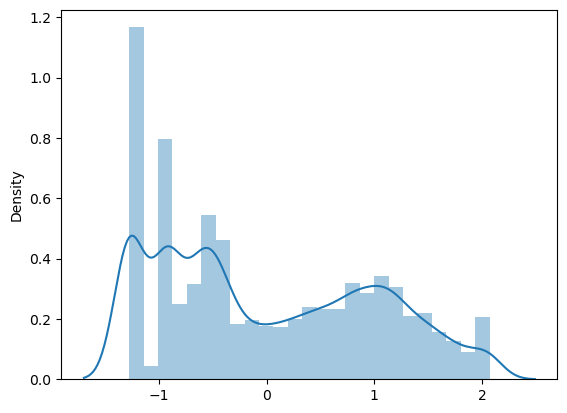

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


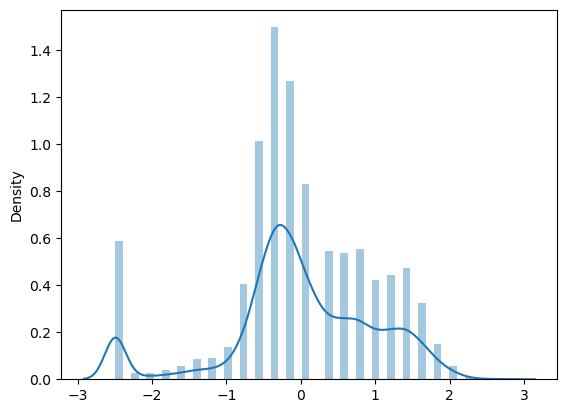

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


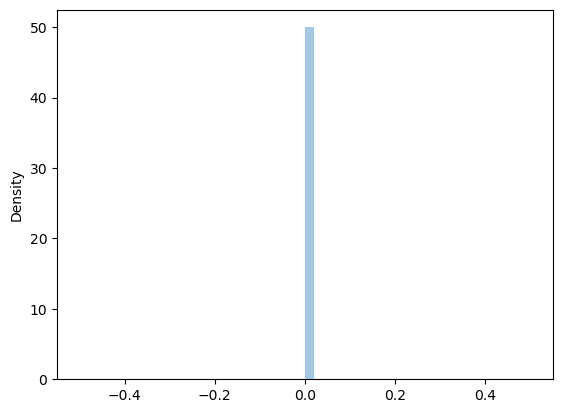

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


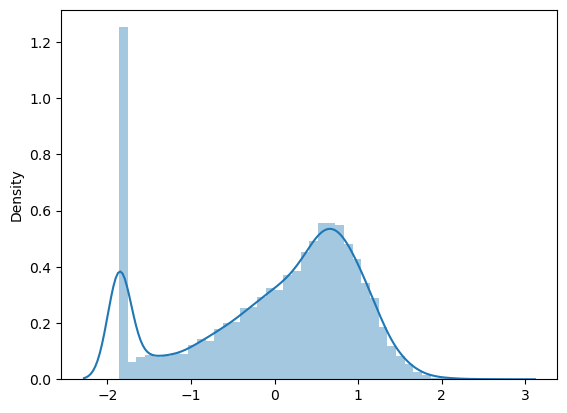

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


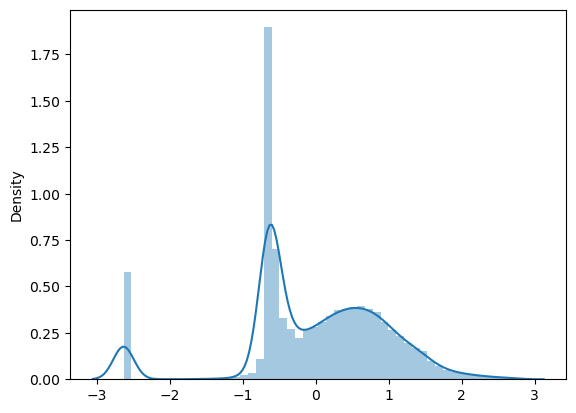

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


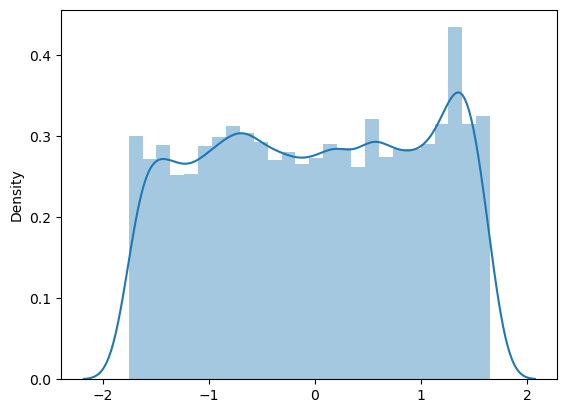

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


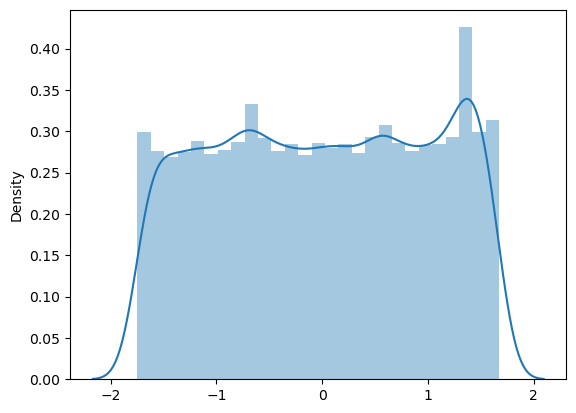

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


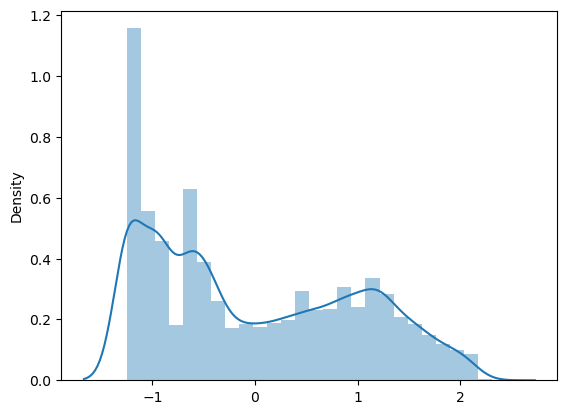

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


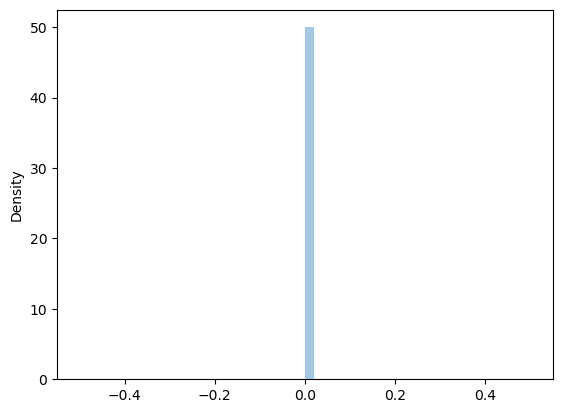

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


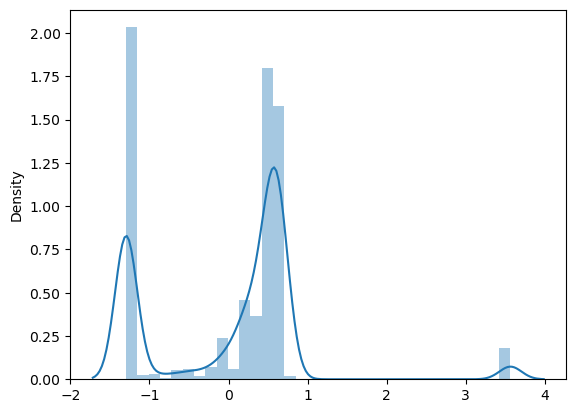

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


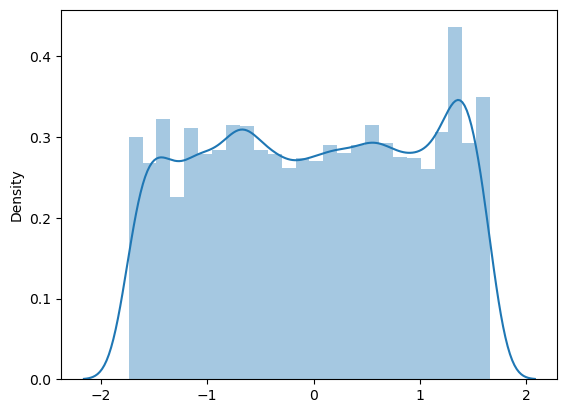

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


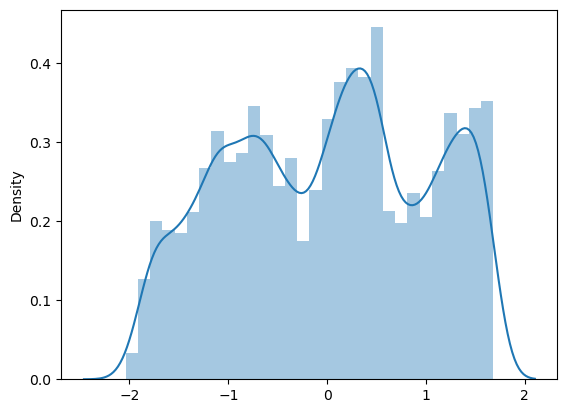

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


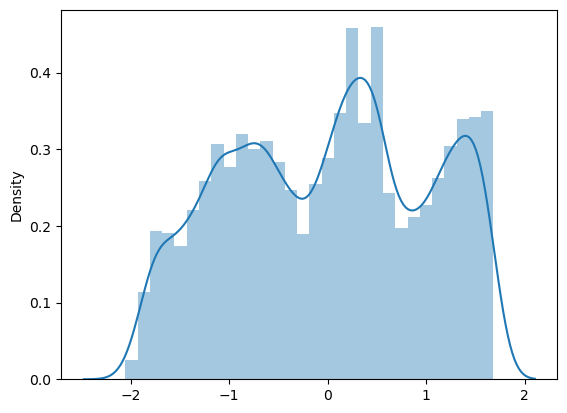

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


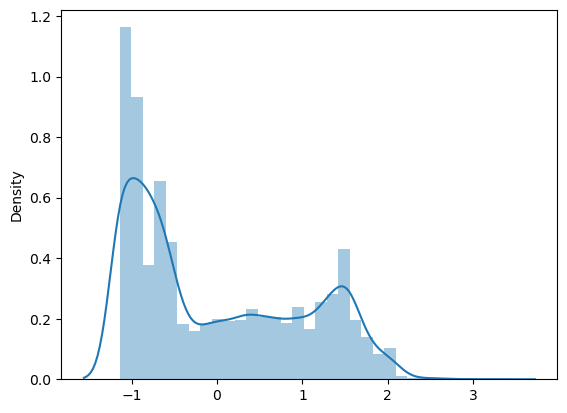

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


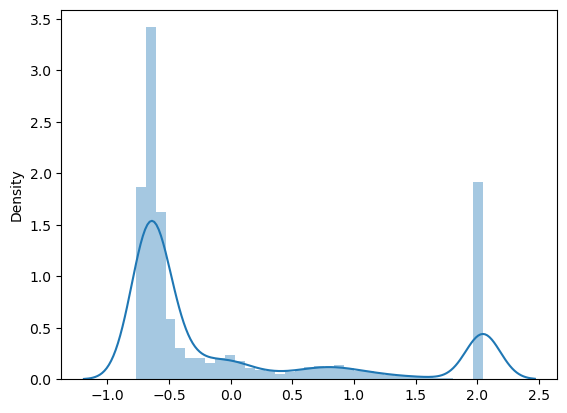

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


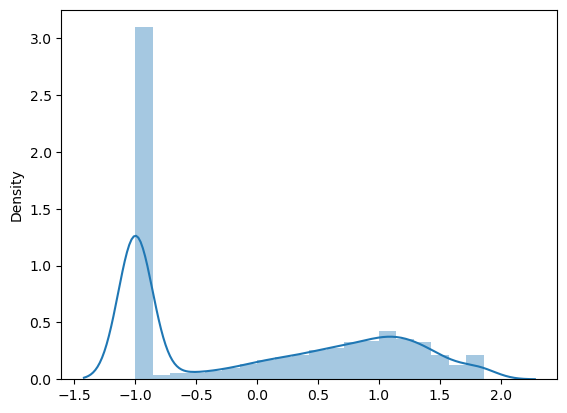

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


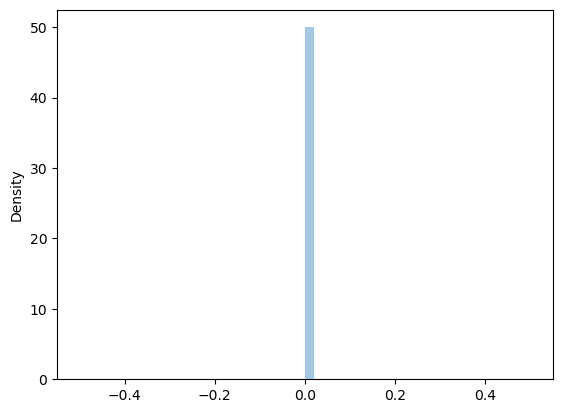

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


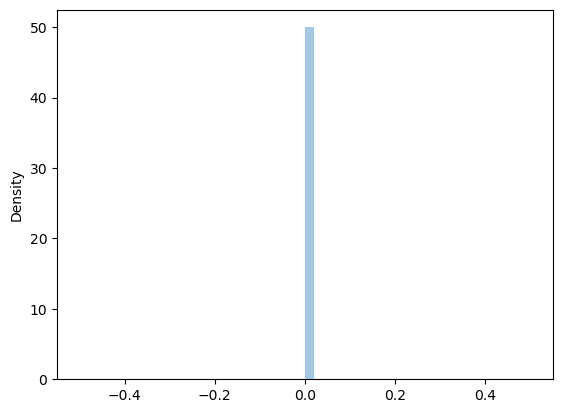

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


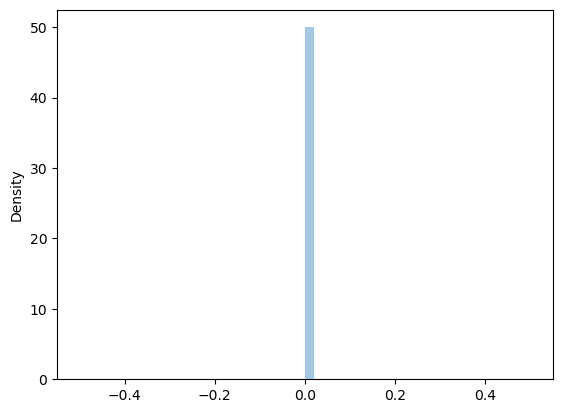

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


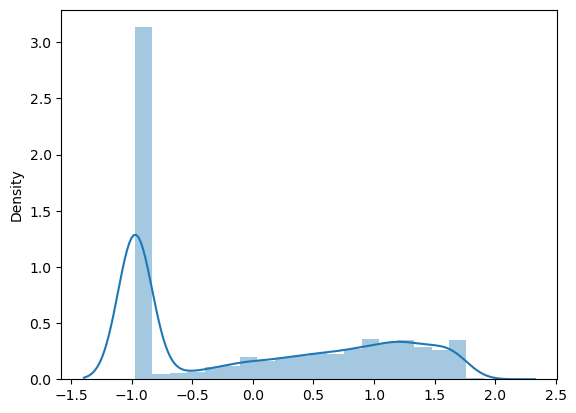

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


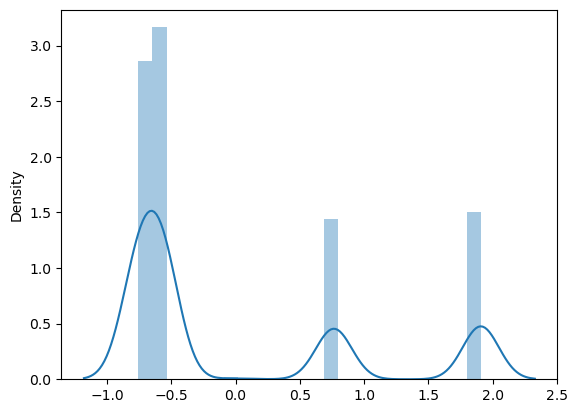

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


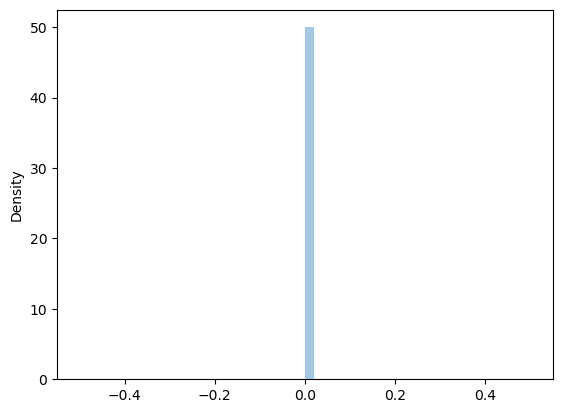

C:\Users\Admin\AppData\Local\Temp\ipykernel_15864\3253445089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=numeric_columns[i])


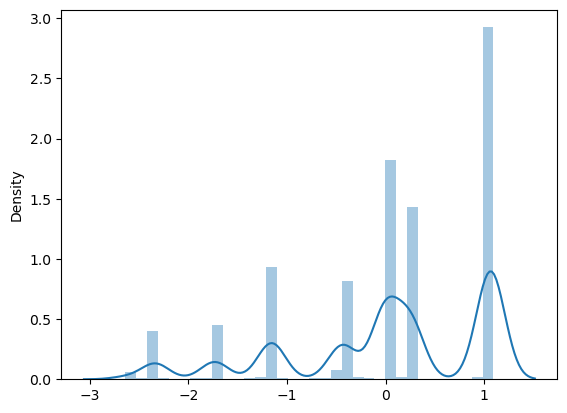

In [59]:
for i in numeric_columns:
    sns.distplot(x=numeric_columns[i])
    plt.show()

### we can see that the fuel economy is specifically high when the collant is between 80 to 95 approx

In [49]:
numeric_columns.columns

Index(['ts', 'lat', 'lng', 'engineload', 'coolant', 'engineoiltemp',
       'vehiclespeed', 'rpm', 'obddistance', 'runtime',
       'engine_torque_percent', 'selected_gear', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
       'engine_throttle_valve2_pos', 'enginefueltemp',
       'drivers_demand_engine_torque_percent', 'engine_torque_mode',
       'accelerator_pedal_pos_2', 'adblue_level'],
      dtype='object')

## Feature Engineering:

In [50]:
cleaned_data

uniqueid          ts        lat        lng  engineload  coolant  \
0      it_220403501  1709340731  19.069340  78.355148          28     74.0   
1      it_220403501  1709340794  19.069347  78.355141          22     74.0   
2      it_220403501  1709340857  19.069414  78.355179          25     74.0   
3      it_220403501  1709340920  19.069258  78.355225          35     74.0   
4      it_220403501  1709340983  19.069094  78.355339           0     74.0   
...             ...         ...        ...        ...         ...      ...   
18429  it_220403501  1713635865  18.869371  79.020393          50     89.0   
18430  it_220403501  1713635929  18.867130  79.018272           0     92.0   
18431  it_220403501  1713635993  18.862076  79.013924          10     87.0   
18432  it_220403501  1713636056  18.859493  79.011673          52     87.0   
18433  it_220403501  1713636120  18.858324  79.009033          72     90.0   

       engineoiltemp  vehiclespeed       rpm  obddistance  ...  \
0          1774.9688       0.00000   749.000     60780800  ...   
1          1774.9688       0.00000  1208.375     60780800  ...   
2          1774.9688       1.40625   752.625     60780800  ...   
3          1774.9688       2.81250   996.375     60780820  ...   
4          1774.9688       4.53125  1065.750     60780840  ...   
...              ...           ...       ...          ...  ...   
18429      1774.9688      14.28125   945.125     71872976  ...   
18430      1774.9688      38.28125  1130.750     71873344  ...   
18431      1774.9688      32.34375   749.750     71874064  ...   
18432      1774.9688      17.71875   820.625     71874464  ...   
18433      1774.9688      16.21875   765.125     71874816  ...   

       engine_throttle_valve1_pos  engine_throttle_valve2_pos  enginefueltemp  \
0                           100.0                         102             215   
1                           100.0                         102             215   
2                           100.0                         102             215   
3                           100.0                         102             215   
4                           100.0                         102             215   
...                           ...                         ...             ...   
18429                       100.0                         102             215   
18430                       100.0                         102             215   
18431                       100.0                         102             215   
18432                       100.0                         102             215   
18433                       100.0                         102             215   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                         0                   1   
1                                        19                   2   
2                                         0                   1   
3                                        28                   2   
4                                         1                   2   
...                                     ...                 ...   
18429                                    34                   2   
18430                                     0                   2   
18431                                     0                   1   
18432                                    46                   9   
18433                                    44                   1   

       accelerator_pedal_pos_2  brake_switch_status  clutch_switch_status  \
0                          102             Released              Released   
1                          102             Released               Pressed   
2                          102              Pressed               Pressed   
3                          102             Released               Pressed   
4                          102             Released               Pressed   
...                        ...           

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cleaned_data["brake_switch_status"] = le.fit_transform(cleaned_data["brake_switch_status"])
cleaned_data["clutch_switch_status"] = le.fit_transform(cleaned_data["clutch_switch_status"])
cleaned_data["parking_switch_status"] = le.fit_transform(cleaned_data["parking_switch_status"])


In [52]:
cleaned_data[["brake_switch_status", "clutch_switch_status", "parking_switch_status"]]

brake_switch_status  clutch_switch_status  parking_switch_status
0                        1                     1                      0
1                        1                     0                      0
2                        0                     0                      1
3                        1                     0                      1
4                        1                     0                      1
...                    ...                   ...                    ...
18429                    1                     0                      1
18430                    1                     0                      1
18431                    1                     0                      1
18432                    1                     0                      1
18433                    1                     0                      1

[18434 rows x 3 columns]

In [53]:
### above three rows have converted from categorical to numeric by using label encoding

## Standardization

In [54]:
numeric_columns # before standardization

ts        lat        lng  engineload  coolant  engineoiltemp  \
0      1709340731  19.069340  78.355148          28     74.0      1774.9688   
1      1709340794  19.069347  78.355141          22     74.0      1774.9688   
2      1709340857  19.069414  78.355179          25     74.0      1774.9688   
3      1709340920  19.069258  78.355225          35     74.0      1774.9688   
4      1709340983  19.069094  78.355339           0     74.0      1774.9688   
...           ...        ...        ...         ...      ...            ...   
18429  1713635865  18.869371  79.020393          50     89.0      1774.9688   
18430  1713635929  18.867130  79.018272           0     92.0      1774.9688   
18431  1713635993  18.862076  79.013924          10     87.0      1774.9688   
18432  1713636056  18.859493  79.011673          52     87.0      1774.9688   
18433  1713636120  18.858324  79.009033          72     90.0      1774.9688   

       vehiclespeed       rpm  obddistance  runtime  ...  fuel_rate  \
0           0.00000   749.000     60780800  1970.85  ...       5.30   
1           0.00000  1208.375     60780800  1970.85  ...       6.45   
2           1.40625   752.625     60780800  1970.85  ...       4.70   
3           2.81250   996.375     60780820  1970.90  ...       8.60   
4           4.53125  1065.750     60780840  1970.90  ...       0.00   
...             ...       ...          ...      ...  ...        ...   
18429      14.28125   945.125     71872976  2287.00  ...       8.50   
18430      38.28125  1130.750     71873344  2287.05  ...       0.00   
18431      32.34375   749.750     71874064  2287.05  ...       1.85   
18432      17.71875   820.625     71874464  2287.05  ...       9.30   
18433      16.21875   765.125     71874816  2287.10  ...      12.05   

       fuel_economy  accelerator_pedal_pos  engine_throttle_valve1_pos  \
0          0.000000                    0.0                       100.0   
1          0.000000                   23.6                       100.0   
2          0.337891                    0.0                       100.0   
3          0.121094                   33.6                       100.0   
4         49.365234                    3.2                       100.0   
...             ...                    ...                         ...   
18429      1.705078                   46.4                       100.0   
18430     49.365234                    0.0                       100.0   
18431     17.273438                    0.0                       100.0   
18432      1.929688                   56.4                       100.0   
18433      1.330078                   55.6                       100.0   

       engine_throttle_valve2_pos  enginefueltemp  \
0                             102             215   
1                             102             215   
2                             102             215   
3                             102             215   
4                             102             215   
...                           ...             ...   
18429                         102             215   
18430                         102             215   
18431                         102             215   
18432                         102             215   
18433                         102             215   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                         0                   1   
1                                        19                   2   
2                                         0                   1   
3                                        28                   2   
4                                         1                   2   
...                                     ...                 ...   
18429                                    34                   2   
18430                                     0                   2   
18431                                     0                   1   
18432            

In [55]:
# standardization
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() # initializing the function
numeric_columns[numeric_columns.columns] = sc.fit_transform(numeric_columns[numeric_columns.columns])
numeric_columns[numeric_columns.columns]

ts       lat       lng  engineload   coolant  engineoiltemp  \
0     -1.803203  1.315657 -1.621531   -0.339301 -2.494321   4.547474e-13   
1     -1.803154  1.315690 -1.621549   -0.540047 -2.494321   4.547474e-13   
2     -1.803105  1.316008 -1.621452   -0.439674 -2.494321   4.547474e-13   
3     -1.803055  1.315267 -1.621335   -0.105097 -2.494321   4.547474e-13   
4     -1.803006  1.314489 -1.621044   -1.276114 -2.494321   4.547474e-13   
...         ...       ...       ...         ...       ...            ...   
18429  1.563146  0.366685  0.072091    0.396767  0.767481   4.547474e-13   
18430  1.563196  0.356050  0.066691   -1.276114  1.419841   4.547474e-13   
18431  1.563246  0.332066  0.055622   -0.941538  0.332574   4.547474e-13   
18432  1.563296  0.319808  0.049891    0.463682  0.332574   4.547474e-13   
18433  1.563346  0.314260  0.043170    1.132835  0.984934   4.547474e-13   

       vehiclespeed       rpm  obddistance   runtime  ...  fuel_rate  \
0         -1.860761 -0.658468    -1.756611 -1.748188  ...  -0.490042   
1         -1.860761  0.872134    -1.756611 -1.748188  ...  -0.349884   
2         -1.782327 -0.646390    -1.756611 -1.748188  ...  -0.563168   
3         -1.703893  0.165767    -1.756605 -1.747647  ...  -0.087850   
4         -1.608030  0.396919    -1.756599 -1.747647  ...  -1.135987   
...             ...       ...          ...       ...  ...        ...   
18429     -1.064221 -0.004995     1.649821  1.672731  ...  -0.100037   
18430      0.274386  0.613494     1.649934  1.673272  ...  -1.135987   
18431     -0.056780 -0.655969     1.650155  1.673272  ...  -0.910516   
18432     -0.872493 -0.419819     1.650278  1.673272  ...  -0.002536   
18433     -0.956156 -0.604741     1.650386  1.673813  ...   0.332624   

       fuel_economy  accelerator_pedal_pos  engine_throttle_valve1_pos  \
0         -0.770126              -0.998882                         0.0   
1         -0.770126              -0.324474                         0.0   
2         -0.750841              -0.998882                         0.0   
3         -0.763215              -0.038708                         0.0   
4          2.047458              -0.907437                         0.0   
...             ...                    ...                         ...   
18429     -0.672807               0.327073                         0.0   
18430      2.047458              -0.998882                         0.0   
18431      0.215777              -0.998882                         0.0   
18432     -0.659987               0.612840                         0.0   
18433     -0.694210               0.589978                         0.0   

       engine_throttle_valve2_pos  enginefueltemp  \
0                             0.0             0.0   
1                             0.0             0.0   
2                             0.0             0.0   
3                             0.0             0.0   
4                             0.0             0.0   
...                           ...             ...   
18429                         0.0             0.0   
18430                         0.0             0.0   
18431                         0.0             0.0   
18432                         0.0             0.0   
18433                         0.0             0.0   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                 -0.972957           -0.758968   
1                                 -0.313784           -0.568454   
2                                 -0.972957           -0.758968   
3                                 -0.001543           -0.568454   
4                                 -0.938264           -0.568454   
...                                     ...                 ...   
18429                              0.206617           -0.568454   
18430                             -0.972957           -0.568454   
18431                             -0.972957           -0.758968   
18432                              0.62

In [56]:
numeric_columns # after standardization

ts       lat       lng  engineload   coolant  engineoiltemp  \
0     -1.803203  1.315657 -1.621531   -0.339301 -2.494321   4.547474e-13   
1     -1.803154  1.315690 -1.621549   -0.540047 -2.494321   4.547474e-13   
2     -1.803105  1.316008 -1.621452   -0.439674 -2.494321   4.547474e-13   
3     -1.803055  1.315267 -1.621335   -0.105097 -2.494321   4.547474e-13   
4     -1.803006  1.314489 -1.621044   -1.276114 -2.494321   4.547474e-13   
...         ...       ...       ...         ...       ...            ...   
18429  1.563146  0.366685  0.072091    0.396767  0.767481   4.547474e-13   
18430  1.563196  0.356050  0.066691   -1.276114  1.419841   4.547474e-13   
18431  1.563246  0.332066  0.055622   -0.941538  0.332574   4.547474e-13   
18432  1.563296  0.319808  0.049891    0.463682  0.332574   4.547474e-13   
18433  1.563346  0.314260  0.043170    1.132835  0.984934   4.547474e-13   

       vehiclespeed       rpm  obddistance   runtime  ...  fuel_rate  \
0         -1.860761 -0.658468    -1.756611 -1.748188  ...  -0.490042   
1         -1.860761  0.872134    -1.756611 -1.748188  ...  -0.349884   
2         -1.782327 -0.646390    -1.756611 -1.748188  ...  -0.563168   
3         -1.703893  0.165767    -1.756605 -1.747647  ...  -0.087850   
4         -1.608030  0.396919    -1.756599 -1.747647  ...  -1.135987   
...             ...       ...          ...       ...  ...        ...   
18429     -1.064221 -0.004995     1.649821  1.672731  ...  -0.100037   
18430      0.274386  0.613494     1.649934  1.673272  ...  -1.135987   
18431     -0.056780 -0.655969     1.650155  1.673272  ...  -0.910516   
18432     -0.872493 -0.419819     1.650278  1.673272  ...  -0.002536   
18433     -0.956156 -0.604741     1.650386  1.673813  ...   0.332624   

       fuel_economy  accelerator_pedal_pos  engine_throttle_valve1_pos  \
0         -0.770126              -0.998882                         0.0   
1         -0.770126              -0.324474                         0.0   
2         -0.750841              -0.998882                         0.0   
3         -0.763215              -0.038708                         0.0   
4          2.047458              -0.907437                         0.0   
...             ...                    ...                         ...   
18429     -0.672807               0.327073                         0.0   
18430      2.047458              -0.998882                         0.0   
18431      0.215777              -0.998882                         0.0   
18432     -0.659987               0.612840                         0.0   
18433     -0.694210               0.589978                         0.0   

       engine_throttle_valve2_pos  enginefueltemp  \
0                             0.0             0.0   
1                             0.0             0.0   
2                             0.0             0.0   
3                             0.0             0.0   
4                             0.0             0.0   
...                           ...             ...   
18429                         0.0             0.0   
18430                         0.0             0.0   
18431                         0.0             0.0   
18432                         0.0             0.0   
18433                         0.0             0.0   

       drivers_demand_engine_torque_percent  engine_torque_mode  \
0                                 -0.972957           -0.758968   
1                                 -0.313784           -0.568454   
2                                 -0.972957           -0.758968   
3                                 -0.001543           -0.568454   
4                                 -0.938264           -0.568454   
...                                     ...                 ...   
18429                              0.206617           -0.568454   
18430                             -0.972957           -0.568454   
18431                             -0.972957           -0.758968   
18432                              0.62

# Summary of Key Insights
# Inference and Recommendations

•	Data loading and preparation:
•	Missing values:  Removed 108 columns which has null values in entire column & rest of the null values replaced with their mean value respectively
•	Duplicate values: no duplicate values found
•	Numerical columns: have created separate data set of numeric data type from cleaned data. Found hidden null values in vibration status column name, have dropped the column
•	Categorical columns: have created separate data set of object data type from cleaned data
•	Outliers: There were some outliers present in 8columns and I have capped the outliers

## Data visualization
For Fuel Economy:
•	Speed: if the speed is more than 60kmph then the fuel economy is optimum
Recommendation: maintain speed around 60kmph for better fuel economy
•	RPM: max rpm is 2000, at Approx 700 rpm fuel economy is high and if the rpm rises from that the fuel economy decreases
Recommendation: maintain rpm between 700 to 950 for best fuel economy
•	Engine torque percent: when the Engine torque percent increasing then fuel economy decreasing
Recommendation: maintain Engine torque percent
•	Engine load: when the Engine load increases then fuel economy decreasing
Recommendation: maintain Engine load to get best fuel economy

For vehicle preformance:
•	Coolant: when the coolant is more than 80 then the fuel economy is good and the coolant helps to maintain the vehicle performance 
recommendation:  maintain coolant above 80 for best fuel economy as well as for good vehicle condition

For emissions:
•	Adbluelevel: Adbluelevel helps to maintain vehicle and it also controls pollution (emissions)
Recommended: maintain fuel level it has positive correlation to adbluelevel

Feature Engineering:
•	converted 3 categorical columns to numeric columns 

Standardization
•	standardised the data to uniform range





